In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption')
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Energy_pathways/'
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Energy_pathways/'
tmpdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/tmp/'
matplotlib.__version__

'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:
O2_consumption=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/avg_O2_consumption_and_abundance_per_day_melt.csv',
                          index_col=0)
O2_consumption=O2_consumption.drop_duplicates()
O2_consumption
O2_consumption['avg_fmol_O2_consumed'].value_counts()

0.002050    142
0.001999    140
0.002101    140
1.237777      1
0.003484      1
           ... 
0.011689      1
0.002050      1
0.005071      1
0.005393      1
0.004125      1
Name: avg_fmol_O2_consumed, Length: 76, dtype: int64

In [3]:
# import KEGG data 
colnames=['metabolism', 'path', 'function', 'gene']
KEGG=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Kegg_data/KO_Orthology_ko00001.txt', 
                sep='\t', names=colnames)

# split the KO away from the rest of the gene data
KEGG[['ko', 'gene']]=KEGG['gene'].str.split(" ", 1, expand=True)

#KEGG[['gene', 'function']]=KEGG['gene'].str.split(";", 1, expand=True)
KEGG=KEGG.dropna()
KEGG

,metabolism,path,function,gene,ko
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],HK; hexokinase [EC:2.7.1.1],K00844
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],GCK; glucokinase [EC:2.7.1.2],K12407
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],glk; glucokinase [EC:2.7.1.2],K00845
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",K01810
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"pgi1; glucose-6-phosphate isomerase, archaeal...",K06859
...,...,...,...,...,...
26363,09160 Human Diseases,09172 Infectious disease: viral,05166 Human T-cell leukemia virus 1 infection ...,"MMP7; matrix metalloproteinase-7 (matrilysin,...",K01397
26364,09160 Human Diseases,09172 Infectious disease: viral,05166 Human T-cell leukemia virus 1 infection ...,HBZ; HTLV-1 basic zipper factor,K23071
26365,09160 Human Diseases,09172 Infectious disease: viral,05166 Human T-cell leukemia virus 1 infection ...,"IL1R1, CD121a; interleukin 1 receptor type I",K04386
26366,09160 Human Diseases,09172 Infectious disease: viral,05166 Human T-cell leukemia virus 1 infection ...,"IL1R2, CD121b; interleukin 1 receptor type II",K04387


In [4]:
# import summary data of the number of transcripts per cell for all the KOs
KO_transcripts=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_KO.csv',
                          index_col=[0,1])

KO_transcripts=KO_transcripts.drop_duplicates()
KO_transcripts


K00003  K00005  K00007  K00009  K00010    K00012  \
genus           date                                                           
AAA164-E04      20171102  0.250251     NaN     NaN     NaN     0.0  0.000000   
                20181030       NaN     NaN     NaN     NaN     NaN       NaN   
                20190402       NaN     NaN     NaN     NaN     NaN  0.280539   
                20190709       NaN     NaN     NaN     NaN     NaN       NaN   
AAA536-G10      20171102  0.084435     NaN     NaN     NaN     NaN  0.024124   
...                            ...     ...     ...     ...     ...       ...   
Winogradskyella 20190709       NaN     NaN     NaN     NaN     NaN  0.066819   
Yoonia          20171102       NaN     NaN     NaN     NaN     NaN       NaN   
                20181030       NaN     NaN     NaN     NaN     NaN       NaN   
                20190402  0.040045     NaN     NaN     NaN     NaN       NaN   
                20190709       NaN     NaN     NaN     NaN     NaN       NaN   

                            K00013    K00014    K00015  K00016  ...  K24157  \
genus           date                                            ...           
AAA164-E04      20171102  0.000000  0.000000       NaN     NaN  ...     NaN   
                20181030       NaN  0.000000       NaN     NaN  ...     NaN   
                20190402       NaN       NaN       NaN     NaN  ...     NaN   
                20190709       NaN       NaN       NaN     NaN  ...     NaN   
AAA536-G10      20171102  0.072373  0.060311       NaN     NaN  ...     NaN   
...                            ...       ...       ...     ...  ...     ...   
Winogradskyella 20190709       NaN       NaN       NaN     NaN  ...     NaN   
Yoonia          20171102       NaN       NaN       NaN     NaN  ...     NaN   
                20181030       NaN       NaN       NaN     NaN  ...     NaN   
                20190402       NaN  0.024027  0.008009     NaN  ...     NaN   
                20190709       NaN       NaN       NaN     NaN  ...     NaN   

                          K24158  K24163  K24180  K24194  K24200  K24204  \
genus           date                                                       
AAA164-E04      20171102     NaN     NaN     NaN     NaN     NaN     NaN   
                20181030     NaN     NaN     NaN     NaN     NaN     NaN   
                20190402     NaN     NaN     NaN     NaN     NaN     NaN   
                20190709     NaN     NaN     NaN     NaN     NaN     NaN   
AAA536-G10      20171102     NaN     NaN     NaN     NaN     NaN     NaN   
...                          ...     ...     ...     ...     ...     ...   
Winogradskyella 20190709     NaN     NaN     NaN     NaN     NaN     NaN   
Yoonia          20171102     0.0     NaN     NaN     NaN     NaN     NaN   
                20181030     NaN     NaN     NaN     NaN     NaN     NaN   
                20190402     NaN     NaN     NaN     NaN     NaN     NaN   
                20190709     NaN     NaN     NaN     NaN     NaN     NaN   

                          K24217  K24288  K24291  
genus           date                              
AAA164-E04      20171102     NaN     NaN     NaN  
                20181030     NaN     NaN     NaN  
                20190402     NaN     NaN     NaN  
                20190709     NaN     NaN     NaN  
AAA536-G10      20171102     NaN     NaN     NaN  
...                          ...     ...     ...  
Winogradskyella 20190709     NaN     NaN     NaN  
Yoonia          20171102     NaN     NaN     NaN  
                20181030     NaN     NaN     NaN  
                20190402     NaN     NaN     NaN  
                20190709     NaN     NaN     NaN  

[660 rows x 4497 columns]

In [5]:
totalRNA=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv',
                index_col=0)
totalRNA

# count the total number of mRNA transcripts per cell
RNApercell=totalRNA.groupby(['genus', 'date'])['transcripts_per_cell'].sum()
RNApercell

genus            date    
AAA164-E04       20171102    807.560509
                 20181030    123.023330
                 20190402    191.608116
                 20190709    200.913807
AAA536-G10       20171102    268.407780
                                ...    
Winogradskyella  20190709     24.121830
Yoonia           20171102    222.500742
                 20181030     84.185621
                 20190402     45.146774
                 20190709     66.258503
Name: transcripts_per_cell, Length: 660, dtype: float64

In [6]:
# import genus statistics

genus_stats=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Genus_statistics.csv',
                       index_col=0)
genus_stats=genus_stats.rename(columns={'GTDB_genus':'genus'})
genus_stats=genus_stats.drop_duplicates()
genus_stats

,genus,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,Class,Order,Family,Genus,Species,Best_classification,Average_gc_content,Average_hypothetical_cds_fraction,median_estimated_diameter,mean_estimated_genome_length,Average_doubling_time,median_doubling_time
0,Unclassified,Unclassified,1790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,43.870487,0.561344,0.660,6.885372e+06,4.165118,3.478185
1,Pelagibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,628,1.0,Bacteria,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Pelagibacter,NaN,Pelagibacter,29.846285,0.220466,0.300,1.464149e+06,8.115193,8.112808
2,SW10,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,326,2.0,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,SW10,NaN,SW10,50.074055,0.512254,0.895,4.920788e+06,4.386646,4.062906
3,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,178,3.0,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,SCGC-AAA076-P13,NaN,SCGC-AAA076-P13,34.074901,0.248851,0.315,1.930576e+06,8.312164,8.593175
4,D2472,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,173,4.0,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,D2472,NaN,D2472,37.613462,0.239195,0.360,2.020084e+06,9.696105,9.841434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,UBA6669,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,1,292.0,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Opitutaceae,UBA6669,NaN,UBA6669,56.763571,0.430412,0.690,5.651669e+06,1.767563,1.767563
213,UBA721,d__Bacteria;p__Planctomycetota;c__Planctomycet...,1,294.0,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,UBA721,UBA721 sp002705165,UBA721,48.148855,0.462866,0.960,5.444938e+06,9.266202,9.266202
214,UBA7359,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,1,295.0,Bacteria,Proteobacteria,Gammaproteobacteria,UBA4486,UBA4486,UBA7359,NaN,UBA7359,37.587477,0.239183,0.590,2.259463e+06,11.276597,11.276597
215,UBA7446,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,296.0,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,UBA7446,NaN,UBA7446,40.534629,0.323387,0.390,2.024038e+06,6.694833,6.694833


Convert the total RNA 

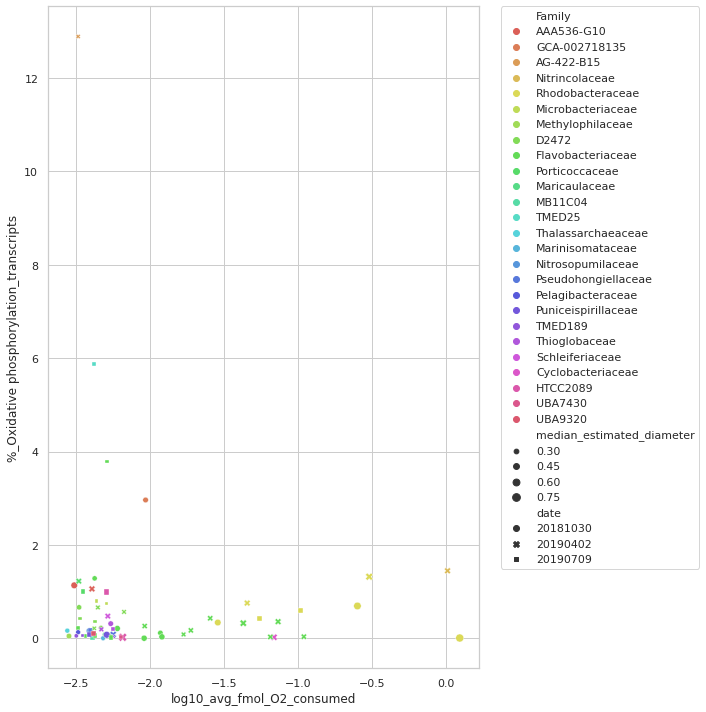

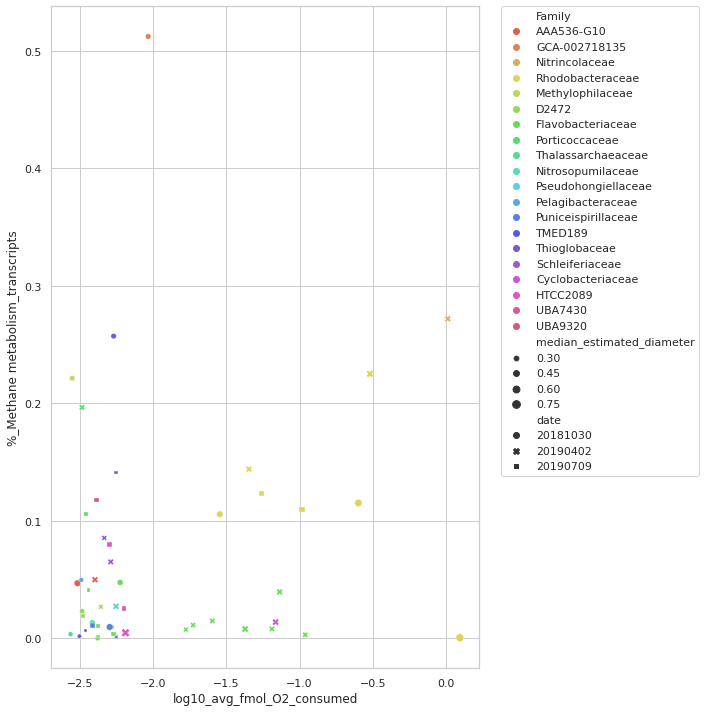

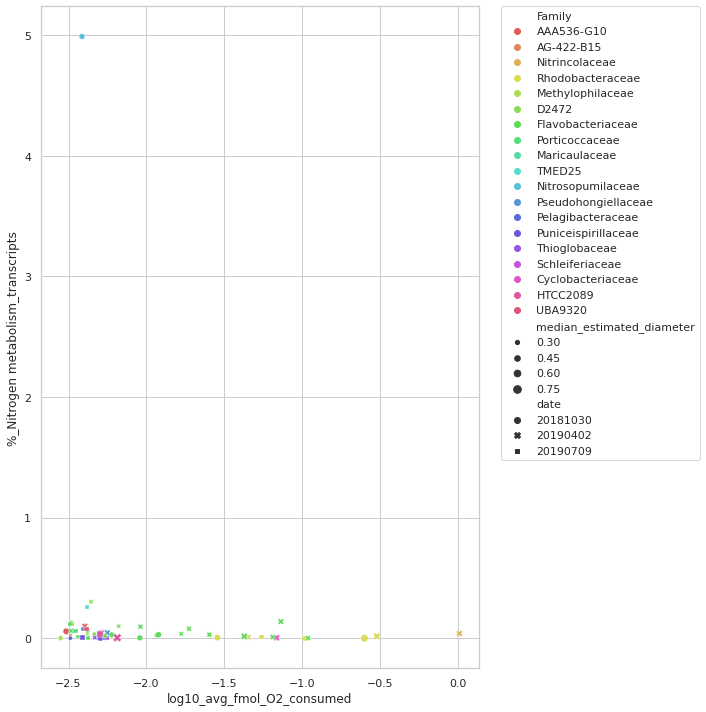

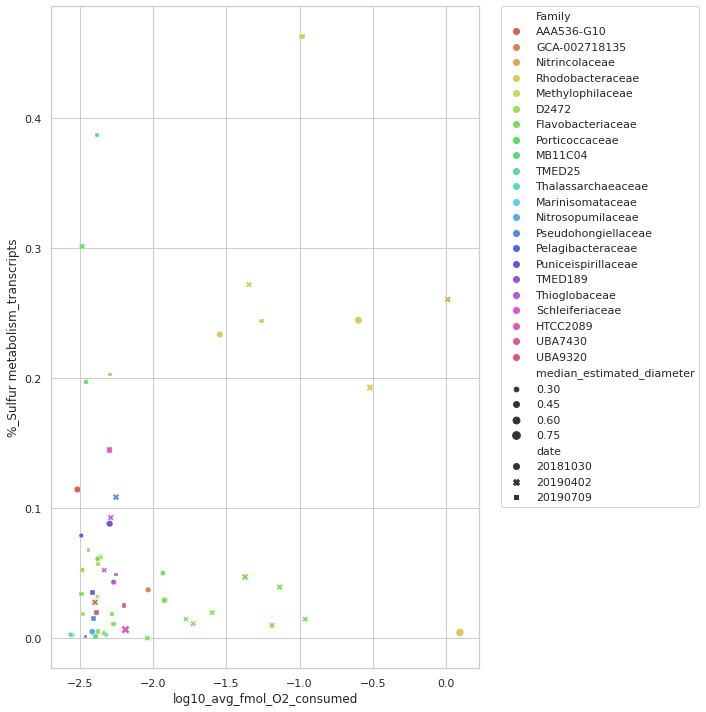

In [7]:
## % of transcripts per pathway

E_pathways=['Oxidative phosphorylation', 'Methane metabolism', 'Nitrogen metabolism', 'Sulfur metabolism']

KO_names=KO_transcripts.columns.values.tolist()
KO_names

# count how many times each KO appears in the entire KEGG database and make a list of those that only appear once 
# aka are in only one pathway
counts=KEGG['ko'].value_counts().rename_axis('ko').reset_index(name='counts')
counts=counts[counts['counts']==1]
singles=counts['ko'].to_list()


for i in E_pathways:
    #create new df with just the KO that have the string in their 'function' column
    df=KEGG[KEGG.function.str.contains(i, case=False)]
    
    # parse this df down so that it only contains the KOs that are exclusive to the pathway of interest
    df=df[df['ko'].isin(singles)] 
    
    # create a list of all the KO in that df
    i_KOs=df['ko'].to_list()
    
    #create list of full KO name using the KO number
    names=[j for j in KO_names if j.startswith(tuple(i_KOs))]
    
    #create new df with only the KO names previosuly selected
    i_transcripts=KO_transcripts.filter(names)
    i_transcripts=i_transcripts.dropna(how='all', axis=0)
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts['metabolism_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[['metabolism_transcripts_per_cell']].copy()
    i_total.to_csv(outdir+i+'_transcripts_per_cell_above_RSG_detection_limit.csv')
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts_perc=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    i_transcripts_perc['%metabolism_transcripts']=(i_transcripts_perc['metabolism_transcripts_per_cell']/
                                                   i_transcripts_perc['transcripts_per_cell'])*100
    
    #merge with O2 consumption data and genus data and drop duplicates
    i_transcripts_perc=i_transcripts_perc.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts_perc=i_transcripts_perc.merge(genus_stats, on=['genus'], how='left')
    i_transcripts_perc=i_transcripts_perc.drop_duplicates()
    
    # limit to genera that were detected above RSG limit (0.0269) and take the log of O2 consumed
    i_transcripts_perc=i_transcripts_perc[i_transcripts_perc['avg_fmol_O2_consumed'] > 0.00269]
    i_transcripts_perc['log10_avg_fmol_O2_consumed']=np.log10(i_transcripts_perc['avg_fmol_O2_consumed'])
    i_transcripts_perc['log10_cells_per_ml']=np.log10(i_transcripts_perc['cells_per_ml'])

    #make and save scatter plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,10))
    testfig=sns.scatterplot(data=i_transcripts_perc, y='%metabolism_transcripts', x='log10_avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel( "%_" +i+ "_transcripts")
#    plt.ylim([0,2.5])
    plt.show()
    fig=testfig.get_figure()
    fig.savefig(images +"percent_"+ i+"_transcripts_above_RSG_genera.pdf")
    
    #save csv files of recruitment for additional examination
    i_transcripts_perc=i_transcripts_perc.sort_values(by='%metabolism_transcripts', ascending=False)
    i_transcripts.to_csv(tmpdir+i+'_above_RSG_genera.csv')
    i_transcripts_perc.to_csv(tmpdir+i+'_above_RSG_genera2.csv')

# I probably need to make a list of exactly what the ~15 genra are that are <-2.0 O2 and >0.5% transcripts and 
# figure out what is going on with these lineages
# Is it worth trying to add cell size more directly into this (O2/cell size ratio)? And or growth rate?

# why do rhodobacteraceae have methanogen, and sulfur genes?

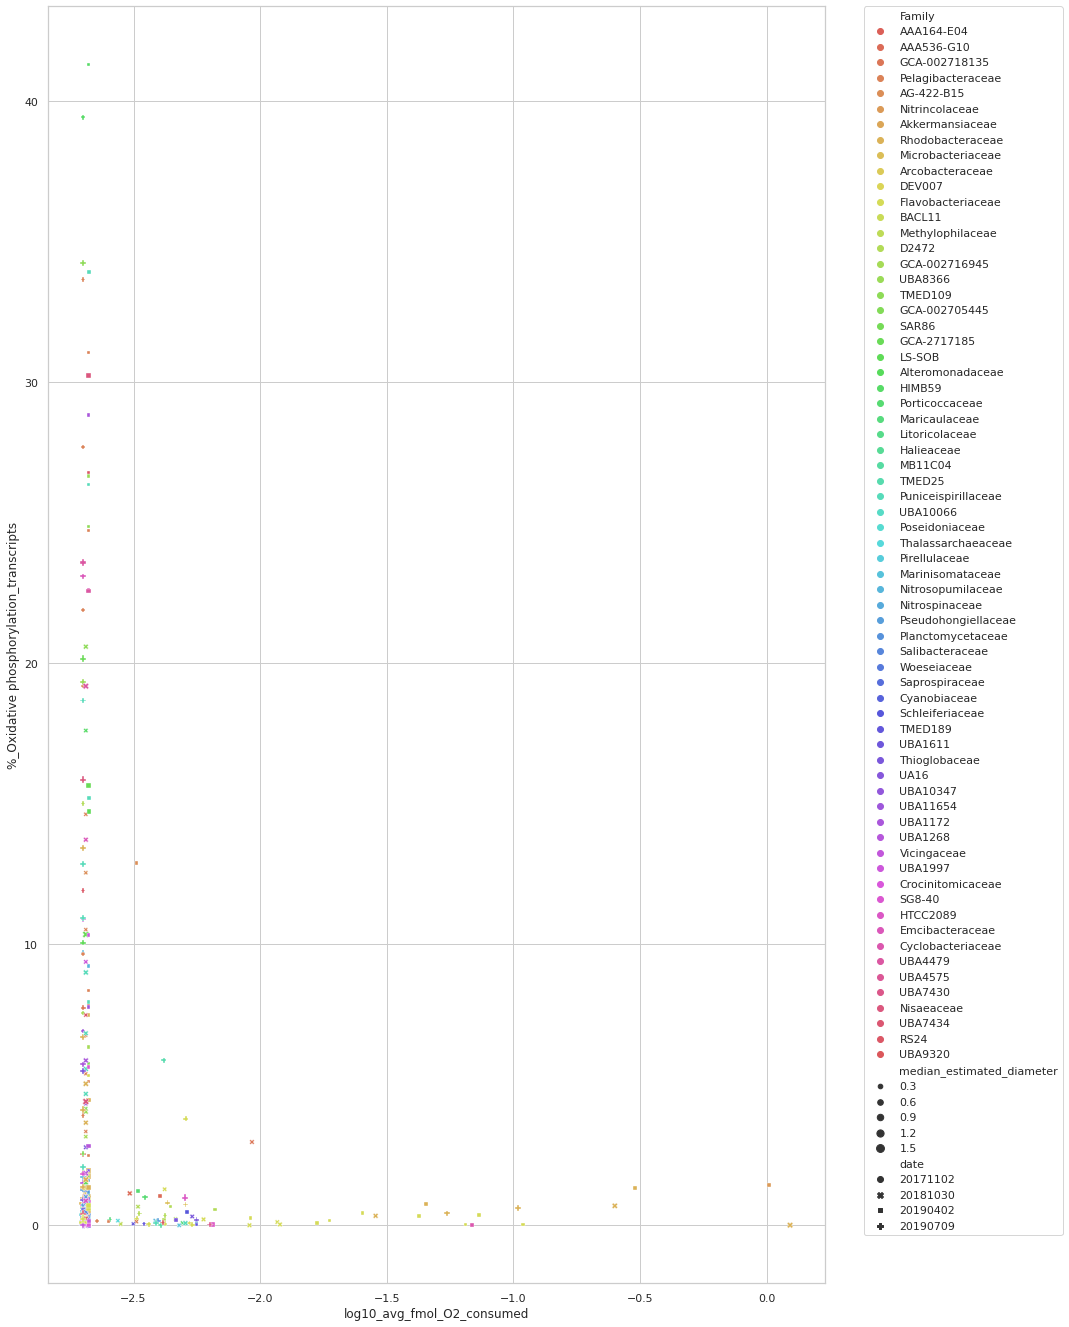

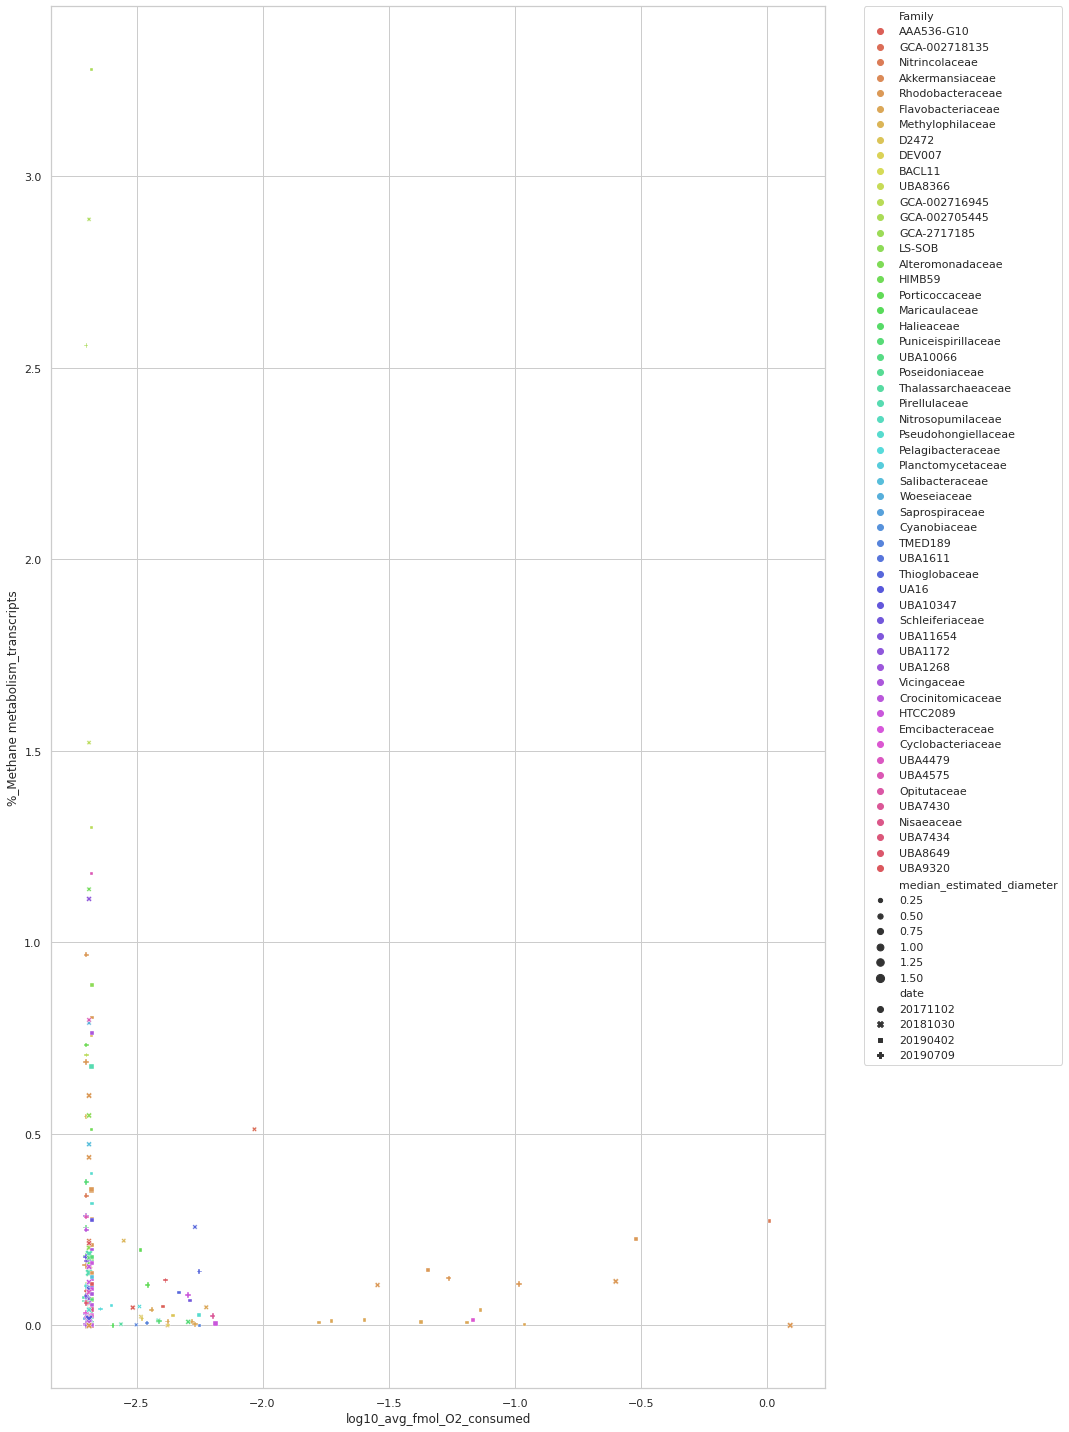

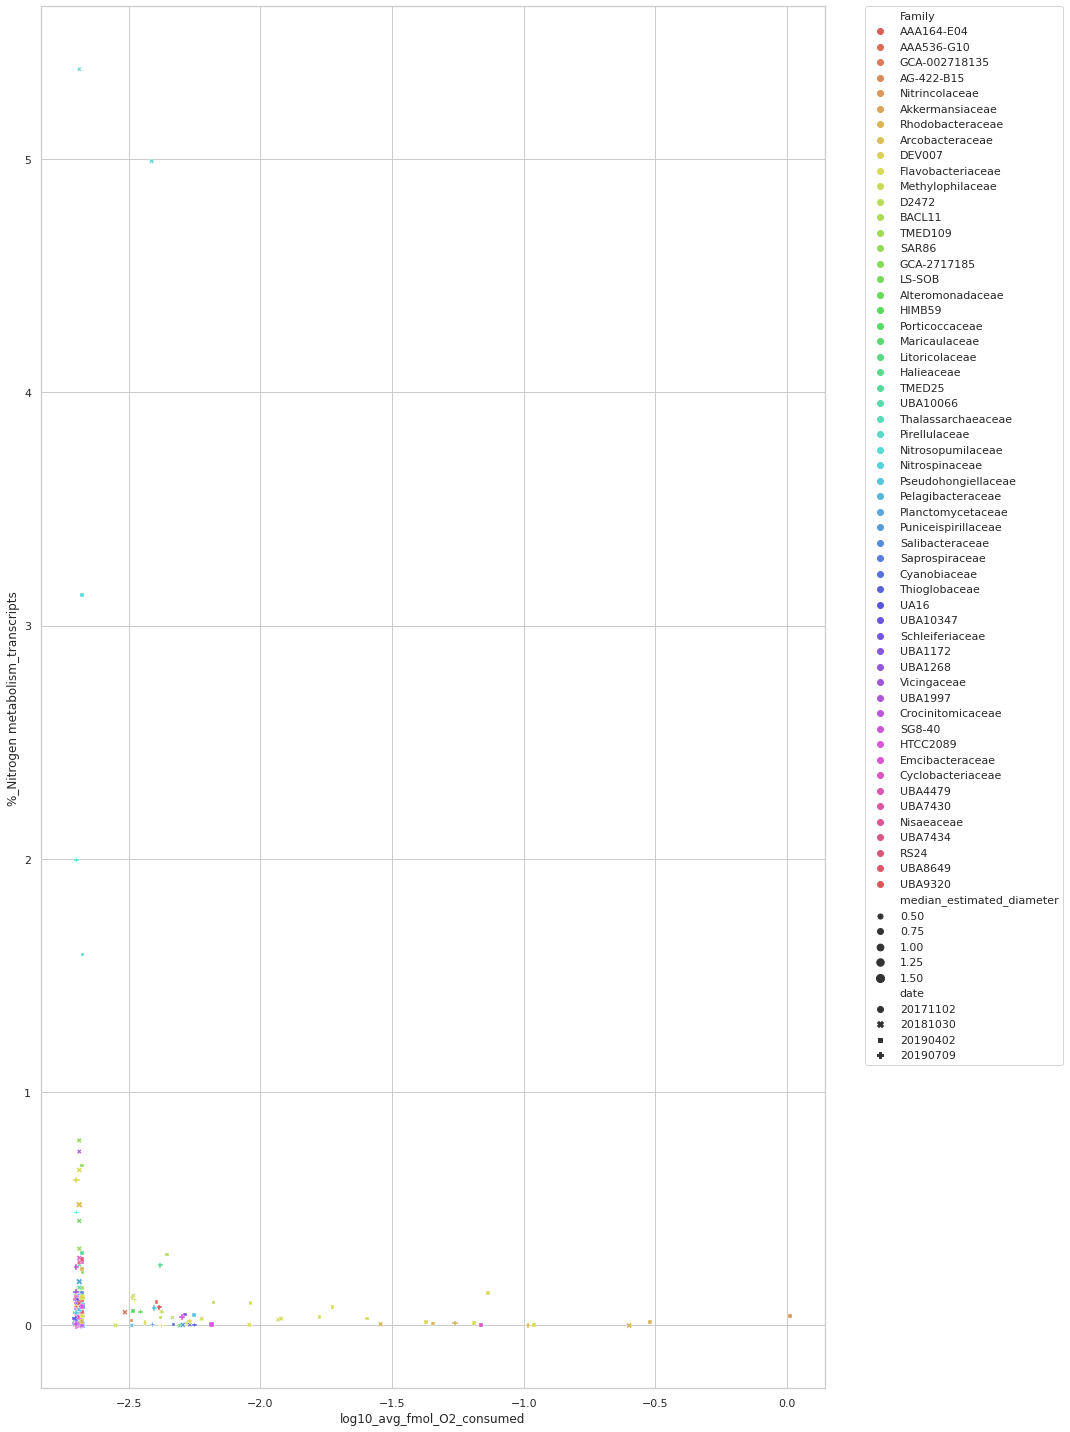

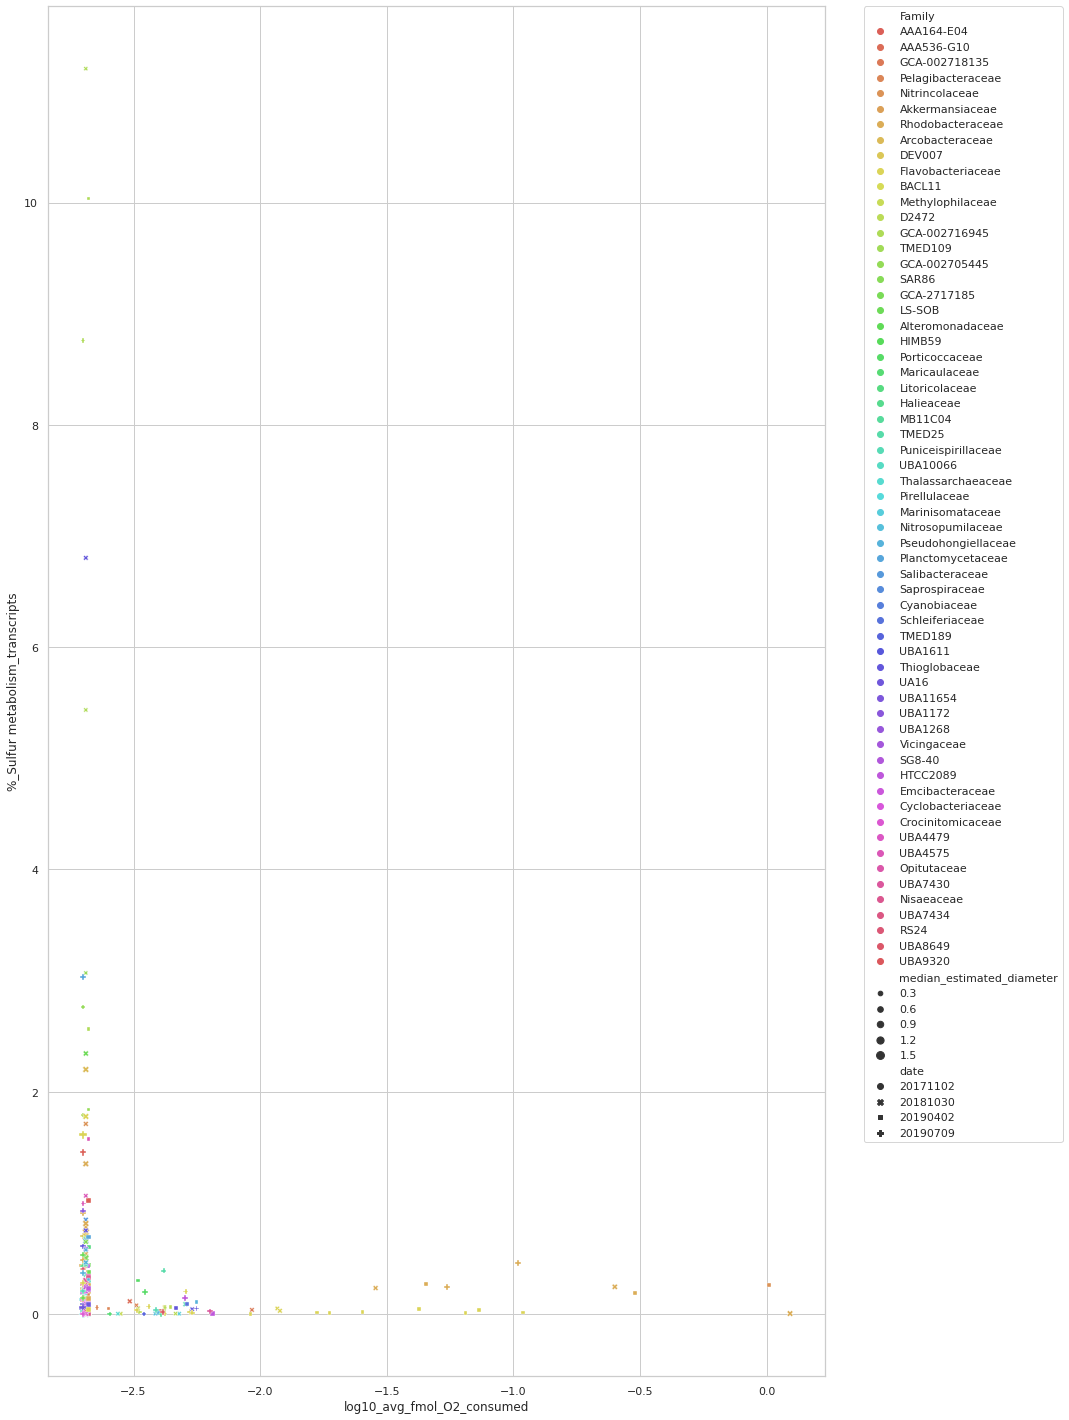

In [8]:
# % of transcripts per pathway for all genera not just the ones above RSG detection limit

for i in E_pathways:
    #create new df with just the KO that have the string in their 'function' column
    df=KEGG[KEGG.function.str.contains(i, case=False)]
    
    # parse this df down so that it only contains the KOs that are exclusive to the pathway of interest
    df=df[df['ko'].isin(singles)] 
    
    # create a list of all the KO in that df
    i_KOs=df['ko'].to_list()
    
    #create list of full KO name using the KO number
    names=[j for j in KO_names if j.startswith(tuple(i_KOs))]
    
    #create new df with only the KO names previosuly selected
    i_transcripts=KO_transcripts.filter(names)
    i_transcripts=i_transcripts.dropna(how='all', axis=0)
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts['metabolism_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[['metabolism_transcripts_per_cell']].copy()
    i_total.to_csv(outdir+i+'_transcripts_per_cell_all_genera.csv')
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts_perc=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    i_transcripts_perc['%metabolism_transcripts']=(i_transcripts_perc['metabolism_transcripts_per_cell']/
                                                   i_transcripts_perc['transcripts_per_cell'])*100
    
    #merge with O2 consumption data and genus data and drop duplicates

    i_transcripts_perc=i_transcripts_perc.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts_perc=i_transcripts_perc.merge(genus_stats, on=['genus'], how='left')
    i_transcripts_perc=i_transcripts_perc.drop_duplicates()
    
    i_transcripts_perc=i_transcripts_perc[i_transcripts_perc['median_estimated_diameter'] <=2 ]
    # take the log of O2 consumed

    i_transcripts_perc['log10_avg_fmol_O2_consumed']=np.log10(i_transcripts_perc['avg_fmol_O2_consumed'])
    i_transcripts_perc['log10_cells_per_ml']=np.log10(i_transcripts_perc['cells_per_ml'])

    #make and save scatter plot
    plt.figure(figsize=(15,20))
    testfig=sns.scatterplot(data=i_transcripts_perc, y='%metabolism_transcripts', x='log10_avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel( "%_" +i+ "_transcripts")
#    plt.ylim([0,2.5])
    plt.show()
    fig=testfig.get_figure()
    fig.savefig(images +"percent_"+ i+"_transcripts_all_genera.pdf")
    
    #save csv files of recruitment for additional examination
    i_transcripts_perc=i_transcripts_perc.sort_values(by='%metabolism_transcripts', ascending=False)
    i_transcripts.to_csv(tmpdir+i+'_all_genera.csv')
    i_transcripts_perc.to_csv(tmpdir+i+'_all_genera2.csv')


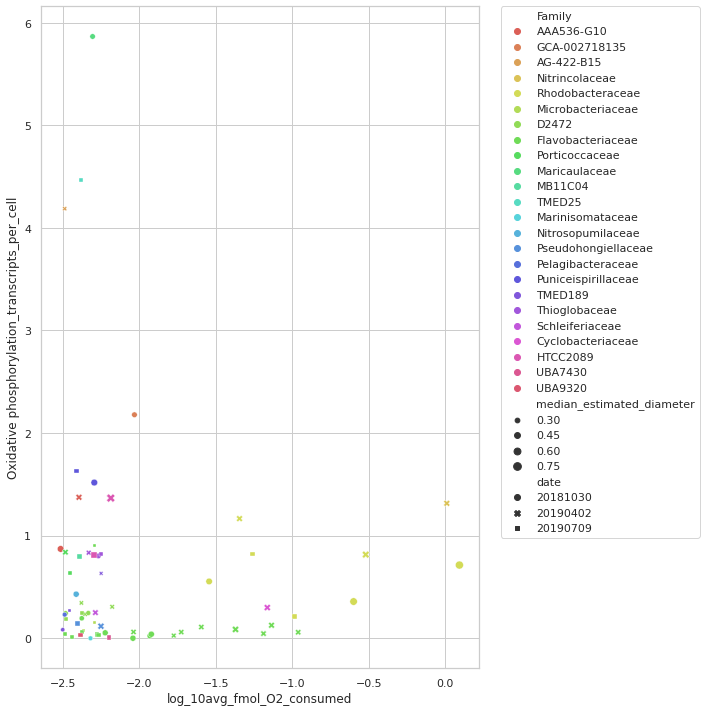

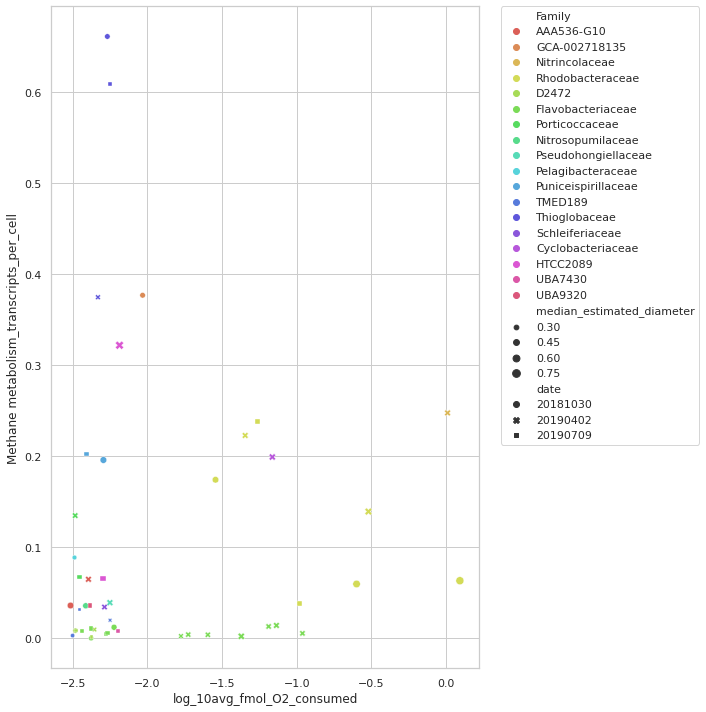

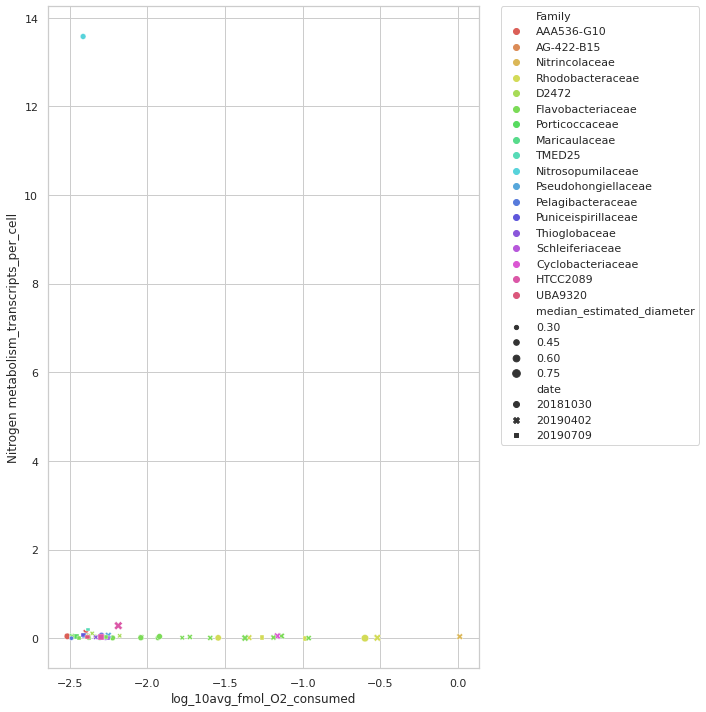

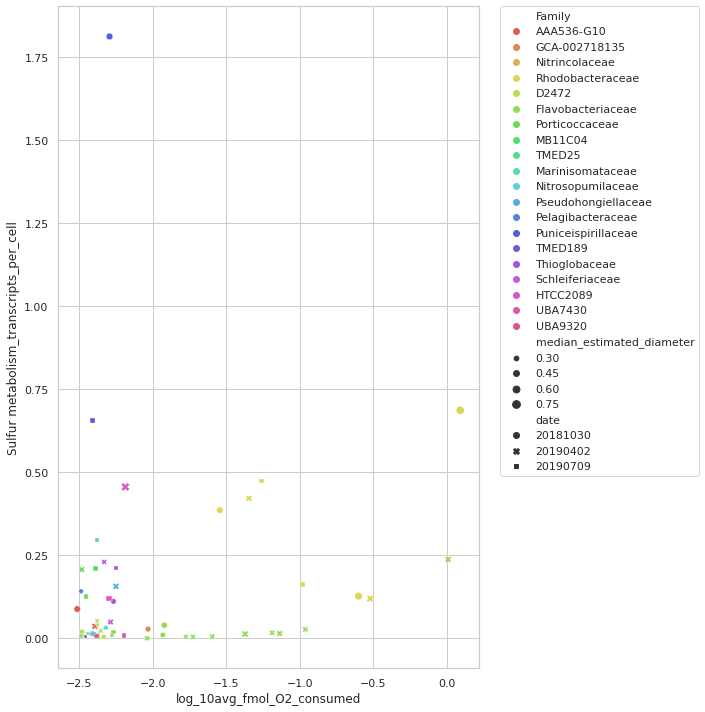

In [9]:
# Number of transcripts per pathway defined above for genera above RSG detection limit

for i in E_pathways:
    #create new df with just the KO that have the string in their 'function' column
    df=KEGG[KEGG.function.str.contains(i, case=False)]
        
    # parse this df down so that it only contains the KOs that are exclusive to the pathway of interest
    df=df[df['ko'].isin(singles)]
    
    # create a list of all the KO in that df
    i_KOs=df['ko'].to_list()
    
    #create list of full KO name using the KO number
    names=[j for j in KO_names if j.startswith(tuple(i_KOs))]
    
    #create new df with only the KO names previosuly selected
    i_transcripts=KO_transcripts.filter(names)
    i_transcripts=i_transcripts.dropna(how='all')
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts['metabolism_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[['metabolism_transcripts_per_cell']].copy()
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    
    
    #merge with O2 consumption data and genus data and drop duplicates
    i_transcripts=i_transcripts.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts=i_transcripts.merge(genus_stats, on=['genus'], how='left')
    i_transcripts=i_transcripts.drop_duplicates()
    
    # limit to genera that were detected above RSG limit and take the log of O2 consumed
    i_transcripts=i_transcripts[i_transcripts['avg_fmol_O2_consumed'] >= 0.003]
    i_transcripts['log_10avg_fmol_O2_consumed']=np.log10(i_transcripts['avg_fmol_O2_consumed'])

    #make and save scatter plot
    plt.figure(figsize=(10,10))
    testfig=sns.scatterplot(data=i_transcripts, y='metabolism_transcripts_per_cell', x='log_10avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel(i+ "_transcripts_per_cell")
    plt.show()
    fig=testfig.get_figure()
    fig.savefig(images +"number_"+ i+"_transcripts_above_RSG_genera.pdf")
    

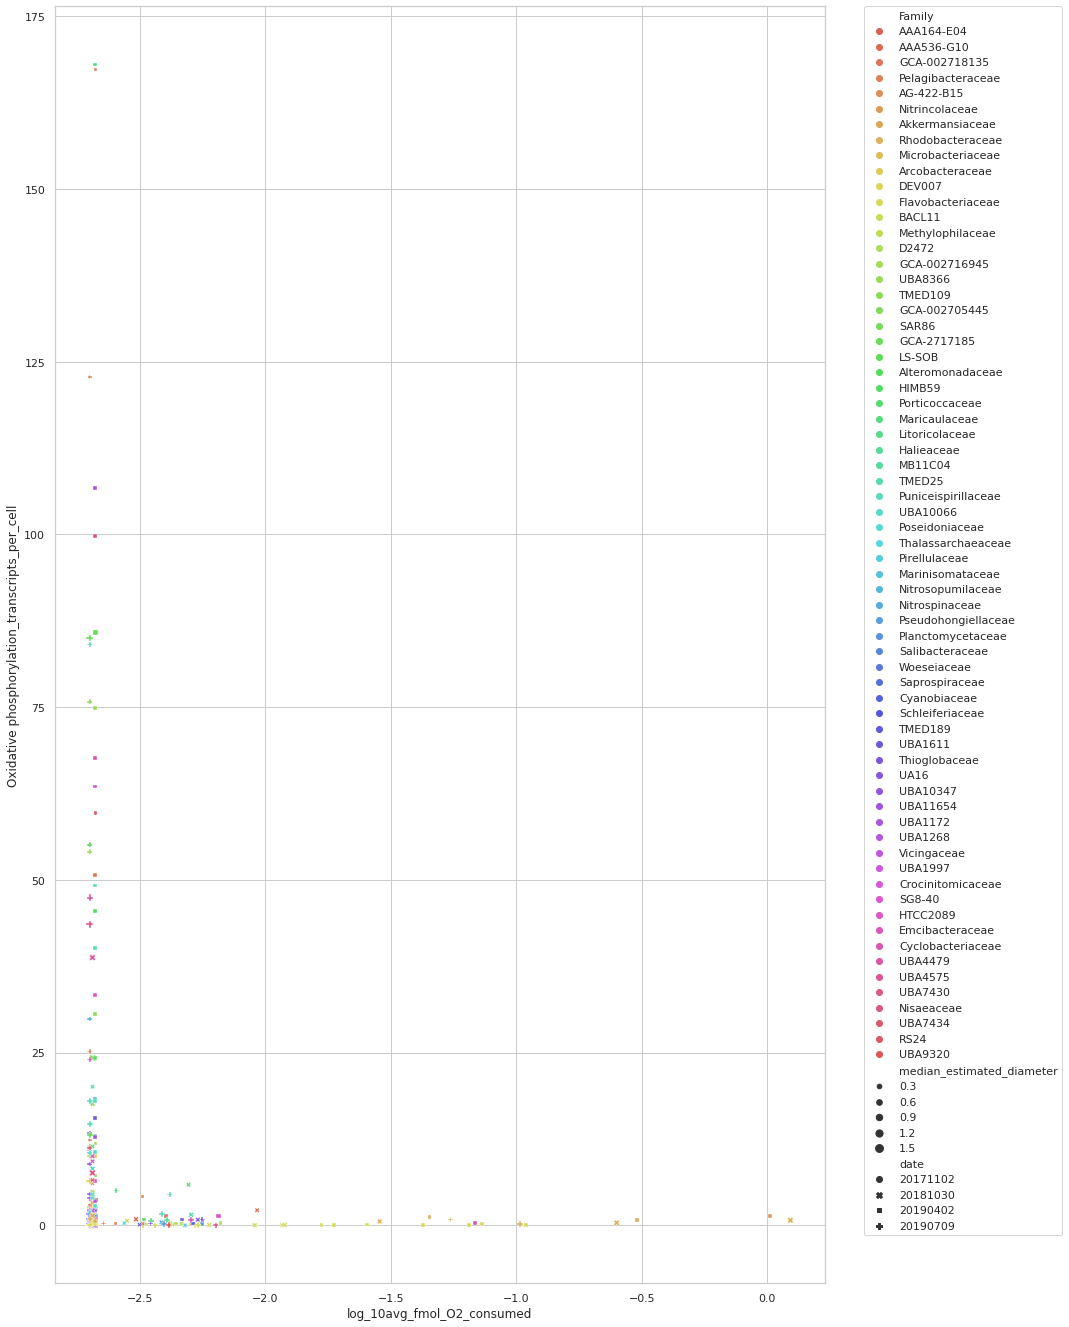

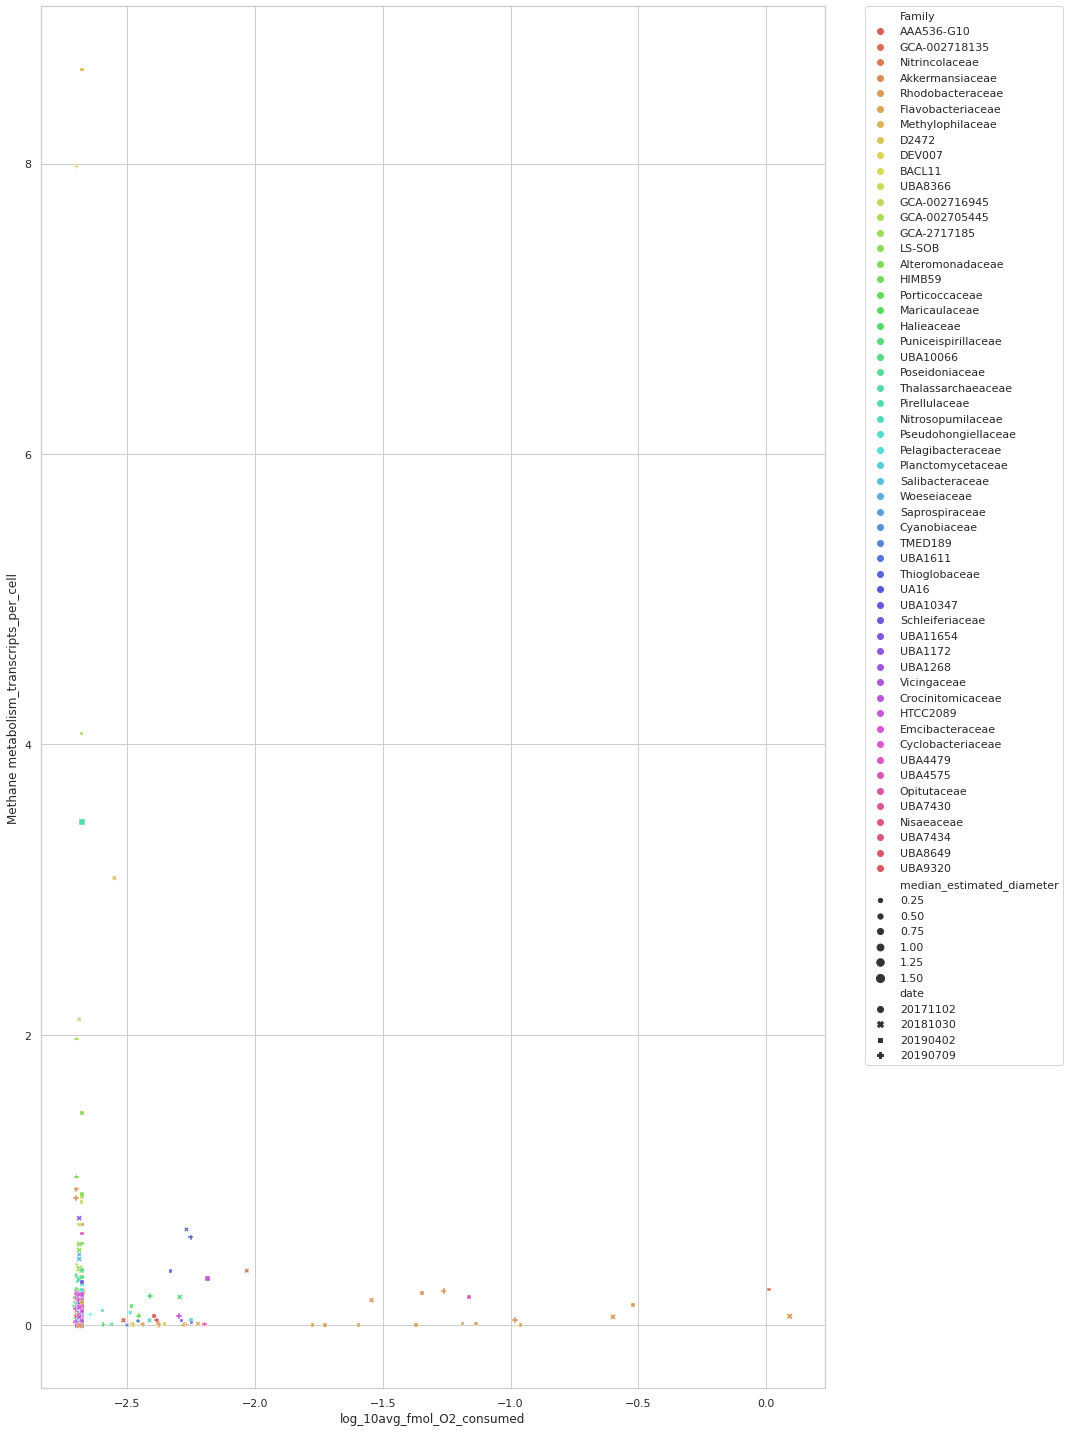

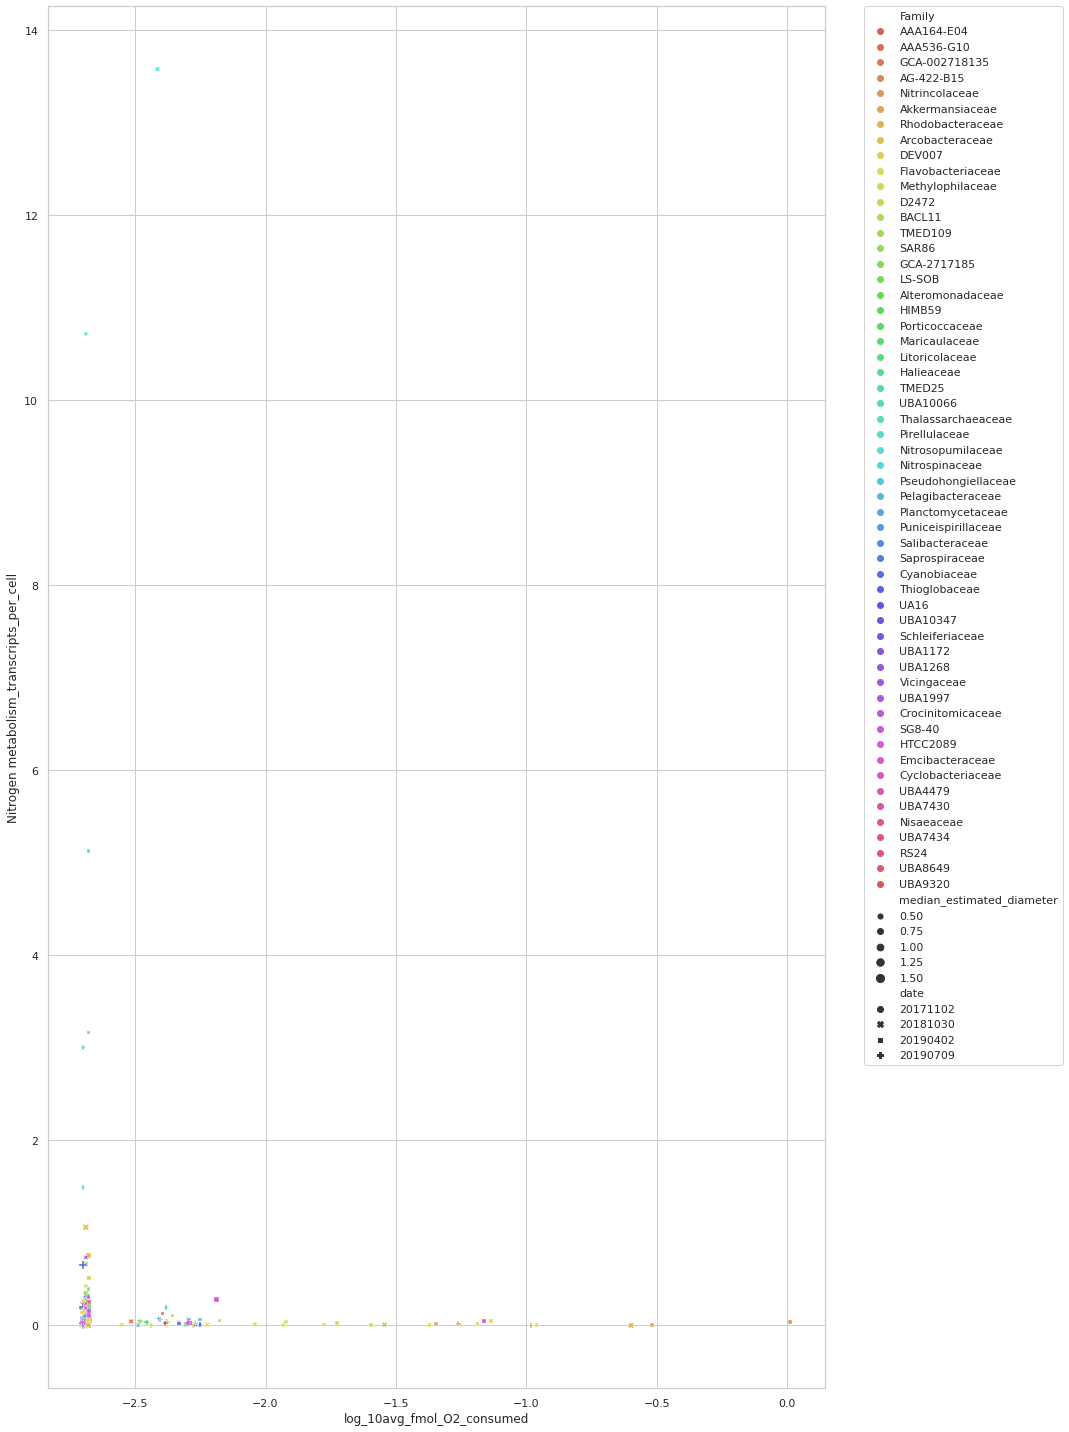

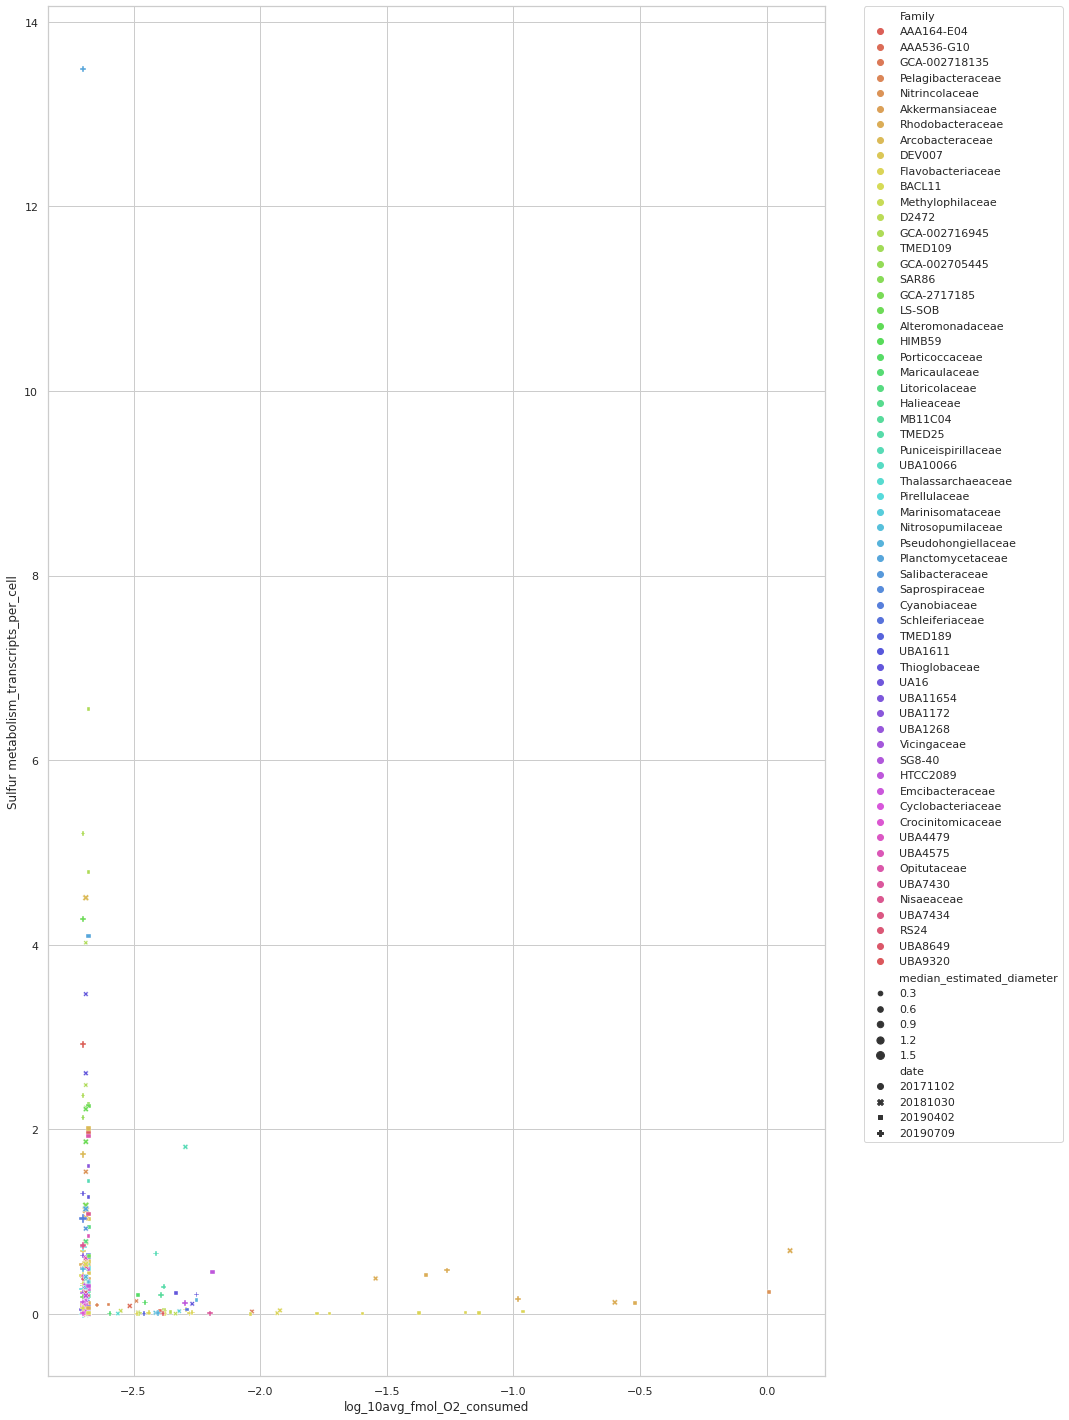

In [10]:
# Number of transcripts per pathway defined above for all genera 

for i in E_pathways:
    #create new df with just the KO that have the string in their 'function' column
    df=KEGG[KEGG.function.str.contains(i, case=False)]
        
    # parse this df down so that it only contains the KOs that are exclusive to the pathway of interest
    df=df[df['ko'].isin(singles)]
    
    # create a list of all the KO in that df
    i_KOs=df['ko'].to_list()
    
    #create list of full KO name using the KO number
    names=[j for j in KO_names if j.startswith(tuple(i_KOs))]
    
    #create new df with only the KO names previosuly selected
    i_transcripts=KO_transcripts.filter(names)
    i_transcripts=i_transcripts.dropna(how='all')
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts['metabolism_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[['metabolism_transcripts_per_cell']].copy()
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    
    
    #merge with O2 consumption data and genus data and drop duplicates
    i_transcripts=i_transcripts.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts=i_transcripts.merge(genus_stats, on=['genus'], how='left')
    i_transcripts=i_transcripts.drop_duplicates()
    
    # limit to genera with cell size <2um and take the log of O2 consumed
    i_transcripts=i_transcripts[i_transcripts['median_estimated_diameter'] <= 2]
    i_transcripts['log_10avg_fmol_O2_consumed']=np.log10(i_transcripts['avg_fmol_O2_consumed'])

    #make and save scatter plot
    plt.figure(figsize=(15,20))
    testfig=sns.scatterplot(data=i_transcripts, y='metabolism_transcripts_per_cell', x='log_10avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel(i+ "_transcripts_per_cell")
    plt.show() 
    fig=testfig.get_figure()
    fig.savefig(images +"number_"+ i+"_transcripts_all_genera.pdf")

In [11]:
Prokka=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_annotation_pivot.csv',
                  index_col=[0,1])

Prokka

(-)-trans-carveol_dehydrogenase:limC:1.1.1.-  \
genus           date                                                     
AAA164-E04      20171102                                           NaN   
                20181030                                           NaN   
                20190402                                           NaN   
                20190709                                           NaN   
AAA536-G10      20171102                                           NaN   
...                                                                ...   
Winogradskyella 20190709                                           NaN   
Yoonia          20171102                                           NaN   
                20181030                                           NaN   
                20190402                                           NaN   
                20190709                                           NaN   

                          (2E%2C6E)-farnesyl_diphosphate_synthase:.:2.5.1.10  \
genus           date                                                           
AAA164-E04      20171102                                                NaN    
                20181030                                                NaN    
                20190402                                                NaN    
                20190709                                                NaN    
AAA536-G10      20171102                                                NaN    
...                                                                     ...    
Winogradskyella 20190709                                                NaN    
Yoonia          20171102                                                NaN    
                20181030                                                NaN    
                20190402                                                NaN    
                20190709                                                NaN    

                          (2R)-3-sulfolactate_dehydrogenase_(NADP(+)):comC:1.1.1.338  \
genus           date                                                                   
AAA164-E04      20171102                                                NaN            
                20181030                                                NaN            
                20190402                                                NaN            
                20190709                                                NaN            
AAA536-G10      20171102                                                NaN            
...                                                                     ...            
Winogradskyella 20190709                                                NaN            
Yoonia          20171102                                                NaN            
                20181030                                                NaN            
                20190402                                                NaN            
                20190709                                                NaN            

                          (2R)-3-sulfolactate_dehydrogenase_(NADP(+)):comC_1:1.1.1.338  \
genus           date                                                                     
AAA164-E04      20171102                                                NaN              
                20181030                                                NaN              
                20190402                                                NaN              
                20190709                                                NaN              
AAA536-G10      20171102                                                NaN              
...                                                                     ...              
Winogradskyella 20190709                                                NaN              
Yoonia          20171102                                           

In [12]:
df = Prokka.filter(['genus','date'], axis=1)
df

Empty DataFrame
Columns: []
Index: [(AAA164-E04, 20171102), (AAA164-E04, 20181030), (AAA164-E04, 20190402), (AAA164-E04, 20190709), (AAA536-G10, 20171102), (AAA536-G10, 20181030), (AAA536-G10, 20190402), (AAA536-G10, 20190709), (AG-337-I02, 20171102), (AG-337-I02, 20181030), (AG-337-I02, 20190402), (AG-337-I02, 20190709), (AG-414-E02, 20171102), (AG-414-E02, 20181030), (AG-414-E02, 20190402), (AG-414-E02, 20190709), (AG-422-B15, 20171102), (AG-422-B15, 20181030), (AG-422-B15, 20190402), (AG-422-B15, 20190709), (ASP10-02a, 20171102), (ASP10-02a, 20181030), (ASP10-02a, 20190402), (ASP10-02a, 20190709), (Akkermansiaceae, 20171102), (Akkermansiaceae, 20181030), (Akkermansiaceae, 20190402), (Akkermansiaceae, 20190709), (Algibacter_B, 20171102), (Algibacter_B, 20181030), (Algibacter_B, 20190402), (Algibacter_B, 20190709), (Aliiglaciecola, 20171102), (Aliiglaciecola, 20181030), (Aliiglaciecola, 20190402), (Aliiglaciecola, 20190709), (Amylibacter, 20171102), (Amylibacter, 20181030), (Amylibacter, 20190402), (Amylibacter, 20190709), (Aquiluna, 20171102), (Aquiluna, 20181030), (Aquiluna, 20190402), (Aquiluna, 20190709), (Arcobacteraceae, 20171102), (Arcobacteraceae, 20181030), (Arcobacteraceae, 20190402), (Arcobacteraceae, 20190709), (Arctic95D-9, 20171102), (Arctic95D-9, 20181030), (Arctic95D-9, 20190402), (Arctic95D-9, 20190709), (Arenitalea, 20171102), (Arenitalea, 20181030), (Arenitalea, 20190402), (Arenitalea, 20190709), (Ascidiaceihabitans, 20171102), (Ascidiaceihabitans, 20181030), (Ascidiaceihabitans, 20190402), (Ascidiaceihabitans, 20190709), (BACL11, 20171102), (BACL11, 20181030), (BACL11, 20190402), (BACL11, 20190709), (BACL14, 20171102), (BACL14, 20181030), (BACL14, 20190402), (BACL14, 20190709), (CAU-1491, 20171102), (CAU-1491, 20181030), (CAU-1491, 20190402), (CAU-1491, 20190709), (CPC320, 20171102), (CPC320, 20181030), (CPC320, 20190402), (CPC320, 20190709), (D2472, 20171102), (D2472, 20181030), (D2472, 20190402), (D2472, 20190709), (DEV007, 20171102), (DEV007, 20181030), (DEV007, 20190402), (DEV007, 20190709), (Draconibacterium, 20171102), (Draconibacterium, 20181030), (Draconibacterium, 20190402), (Draconibacterium, 20190709), (EC70, 20171102), (EC70, 20181030), (EC70, 20190402), (EC70, 20190709), (Flavobacteriaceae, 20171102), (Flavobacteriaceae, 20181030), (Flavobacteriaceae, 20190402), (Flavobacteriaceae, 20190709), (Flavobacteriales, 20171102), (Flavobacteriales, 20181030), (Flavobacteriales, 20190402), (Flavobacteriales, 20190709), ...]

[660 rows x 0 columns]

In [13]:
genes=['cytochrome_c_oxidase', 'cysH', 'proteorhodopsin']
# nirA and bacteriochlorphyl not found
df = Prokka.filter(['genus','date'], axis=1)
df
for i in genes:
    i_transcripts=Prokka.filter(regex=i, axis=1)
#    print(i)
    i_transcripts=i_transcripts.dropna(how='all')
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts[i+'_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[[i+'_transcripts_per_cell']].copy()
    df=df.merge(i_total, on=['genus', 'date'], how='left')
#    print(df)
df=df.dropna(how='all', axis=0)
df

cytochrome_c_oxidase_transcripts_per_cell  \
genus           date                                                  
AAA164-E04      20171102                                   0.000000   
                20181030                                   0.140961   
                20190402                                   0.000000   
                20190709                                   0.000000   
AAA536-G10      20171102                                        NaN   
...                                                             ...   
Winogradskyella 20190402                                   0.087925   
                20190709                                   0.000000   
Yoonia          20171102                                   0.968799   
                20181030                                   0.136665   
                20190402                                   0.008009   

                          cysH_transcripts_per_cell  \
genus           date                                  
AAA164-E04      20171102                   0.750753   
                20181030                        NaN   
                20190402                        NaN   
                20190709                   0.417700   
AAA536-G10      20171102                        NaN   
...                                             ...   
Winogradskyella 20190402                        NaN   
                20190709                        NaN   
Yoonia          20171102                        NaN   
                20181030                        NaN   
                20190402                        NaN   

                          proteorhodopsin_transcripts_per_cell  
genus           date                                            
AAA164-E04      20171102                                   NaN  
                20181030                                   NaN  
                20190402                                   NaN  
                20190709                                   NaN  
AAA536-G10      20171102                              1.375089  
...                                                        ...  
Winogradskyella 20190402                              0.205159  
                20190709                              0.083524  
Yoonia          20171102                                   NaN  
                20181030                                   NaN  
                20190402                                   NaN  

[517 rows x 3 columns]

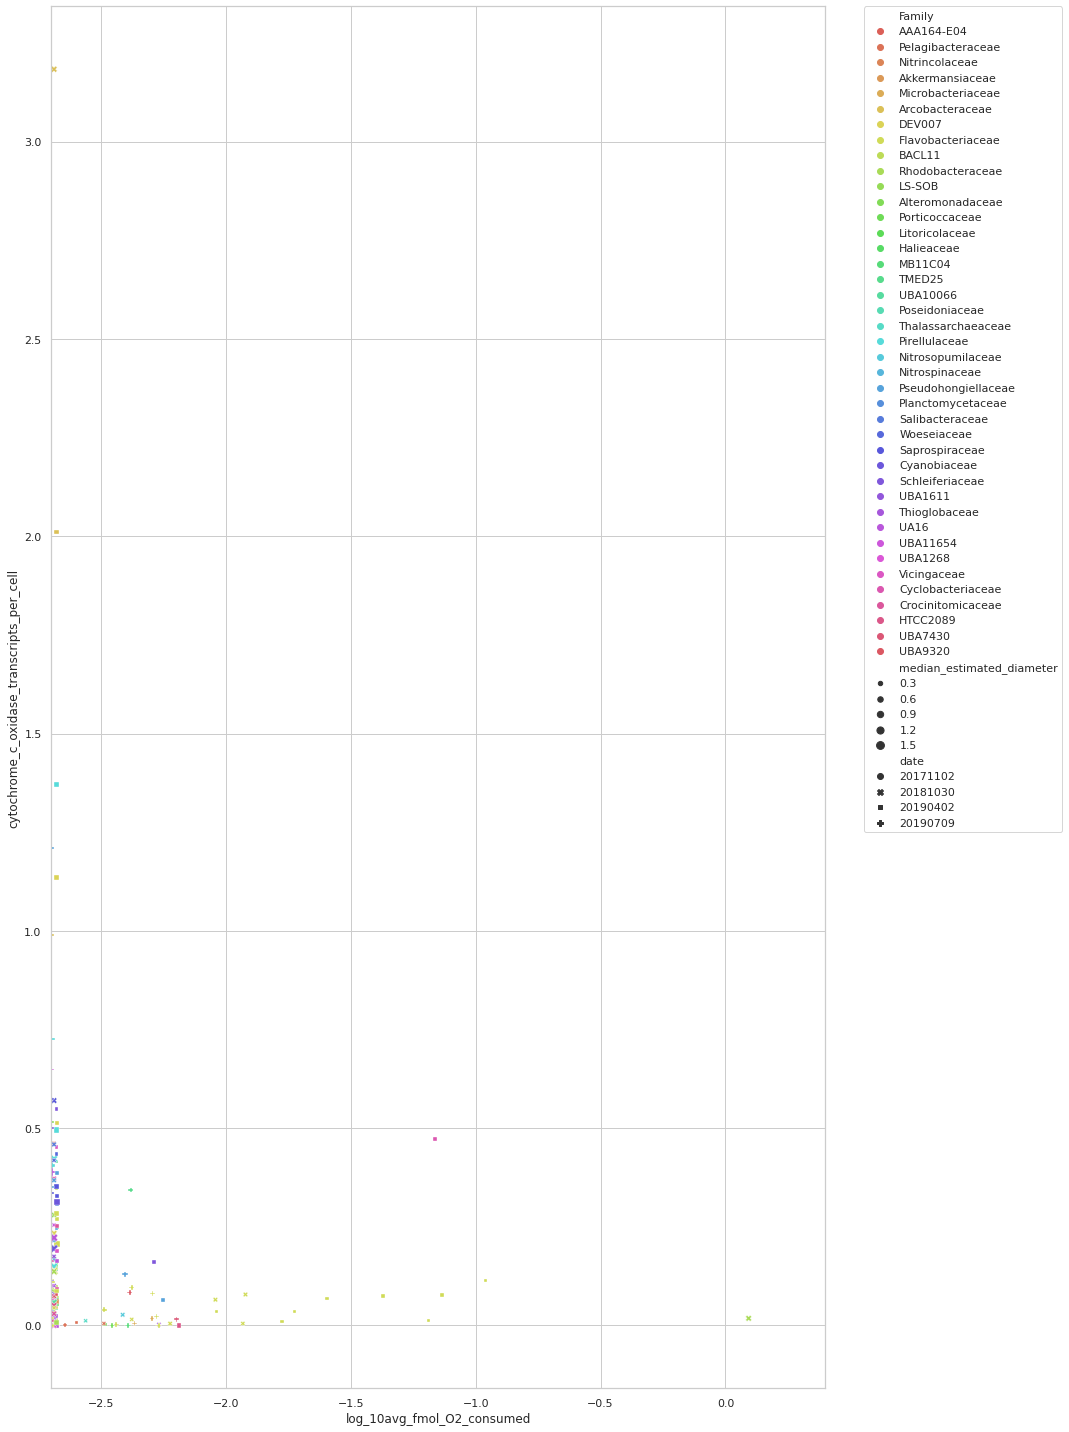

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

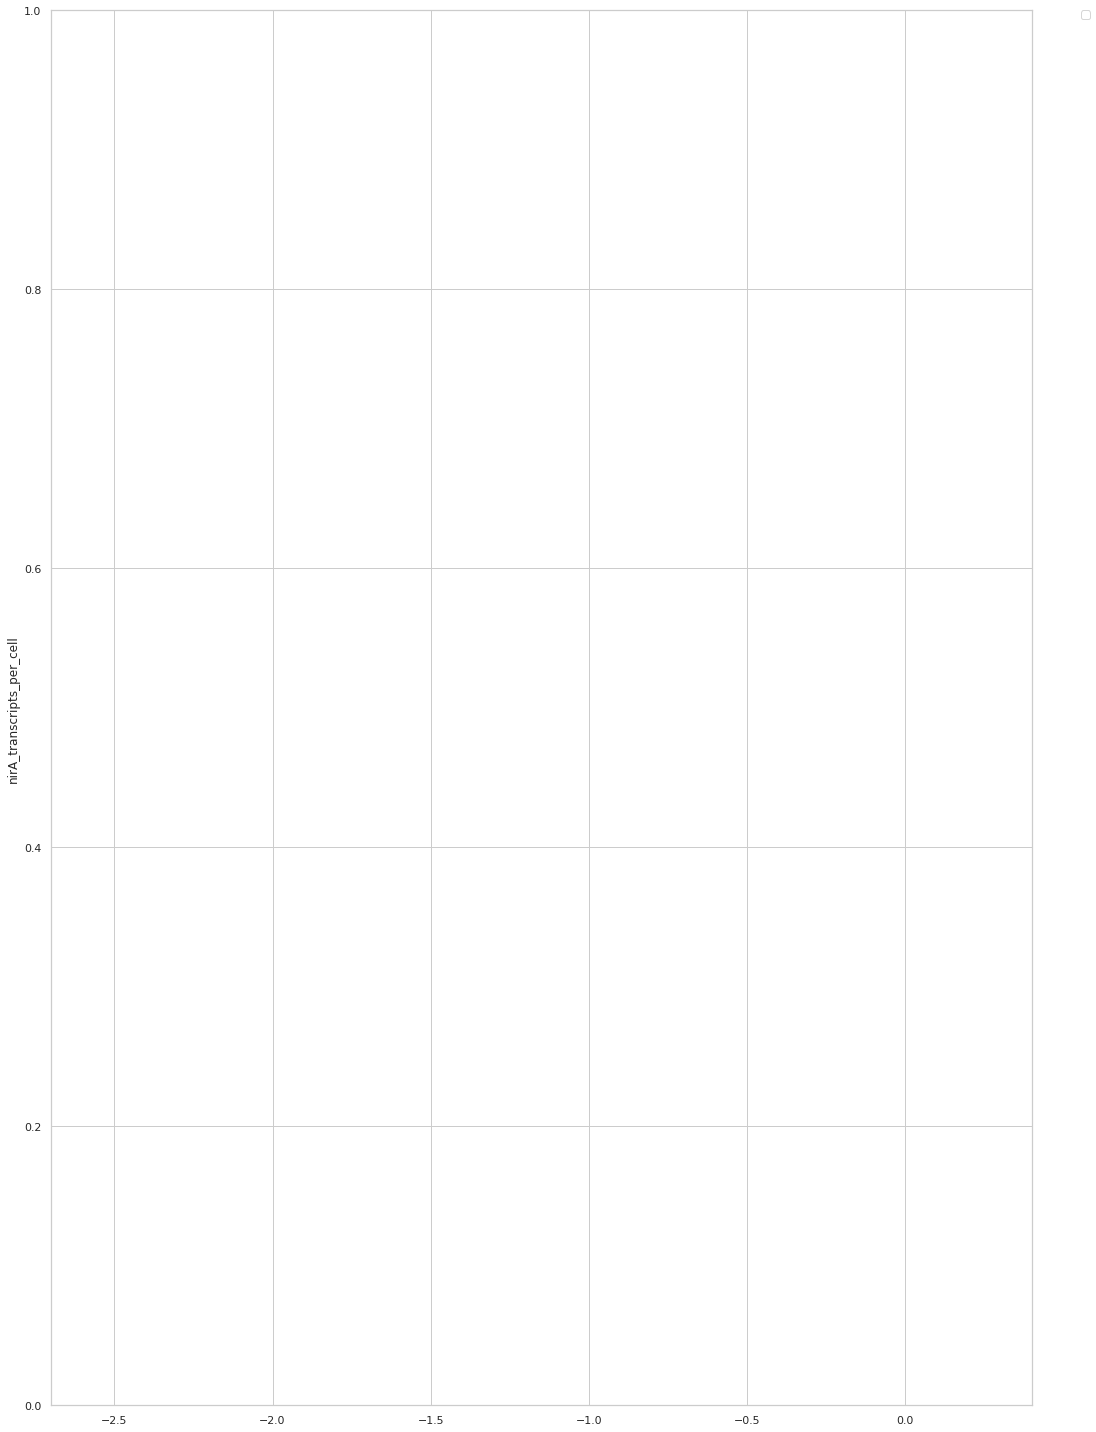

<Figure size 432x288 with 0 Axes>

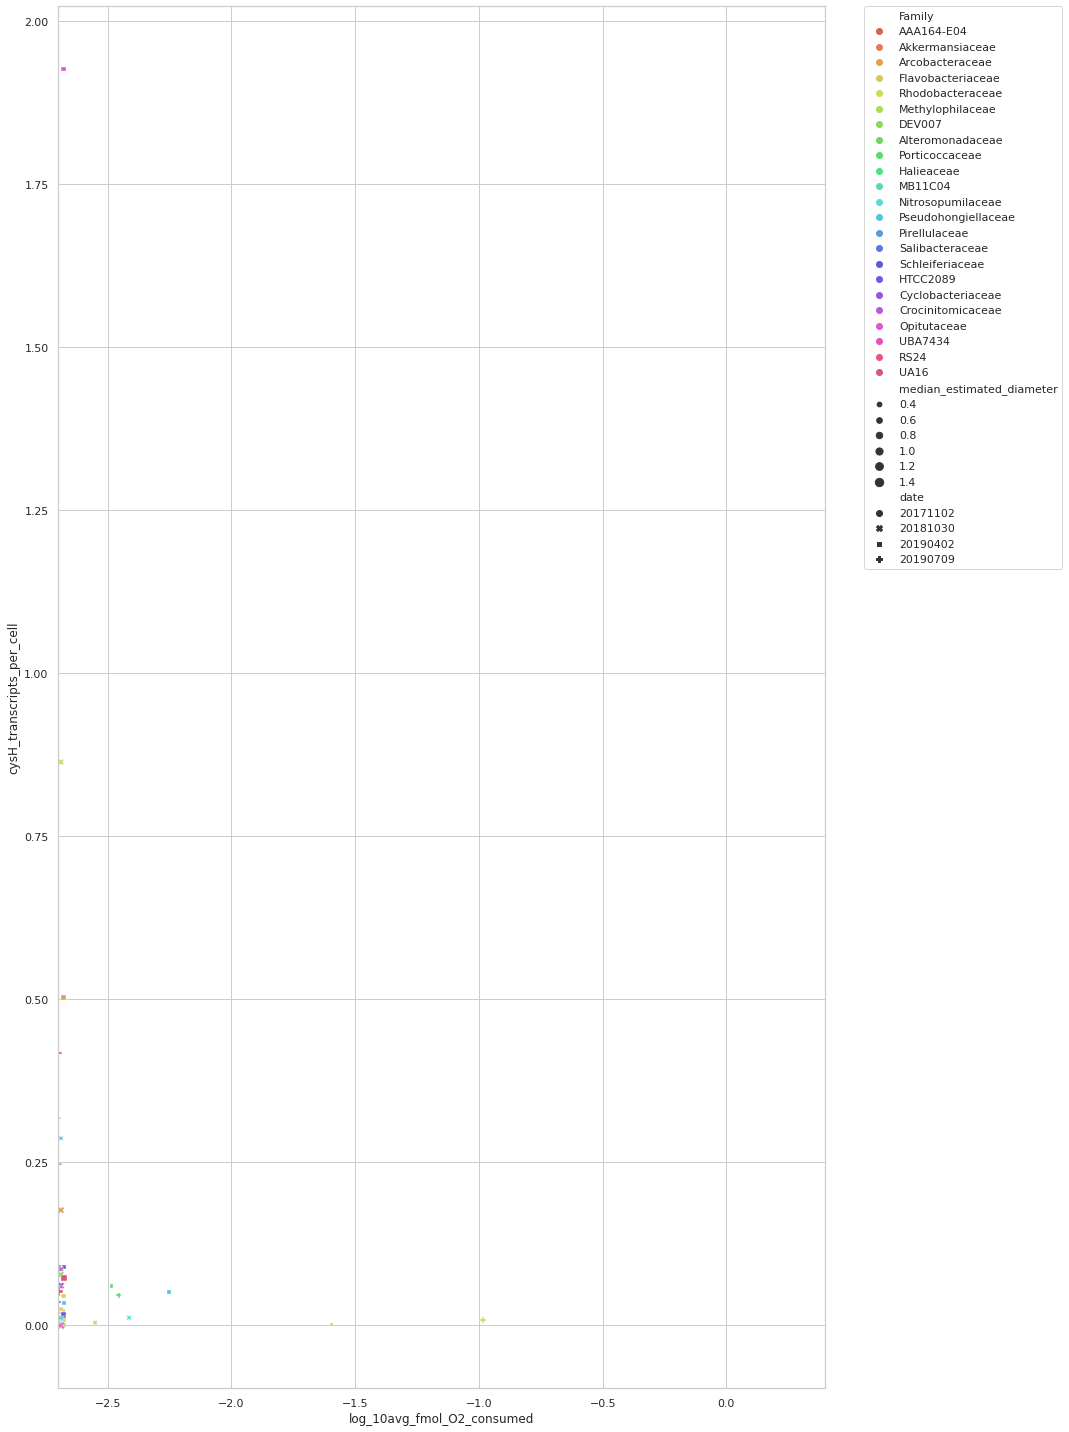

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

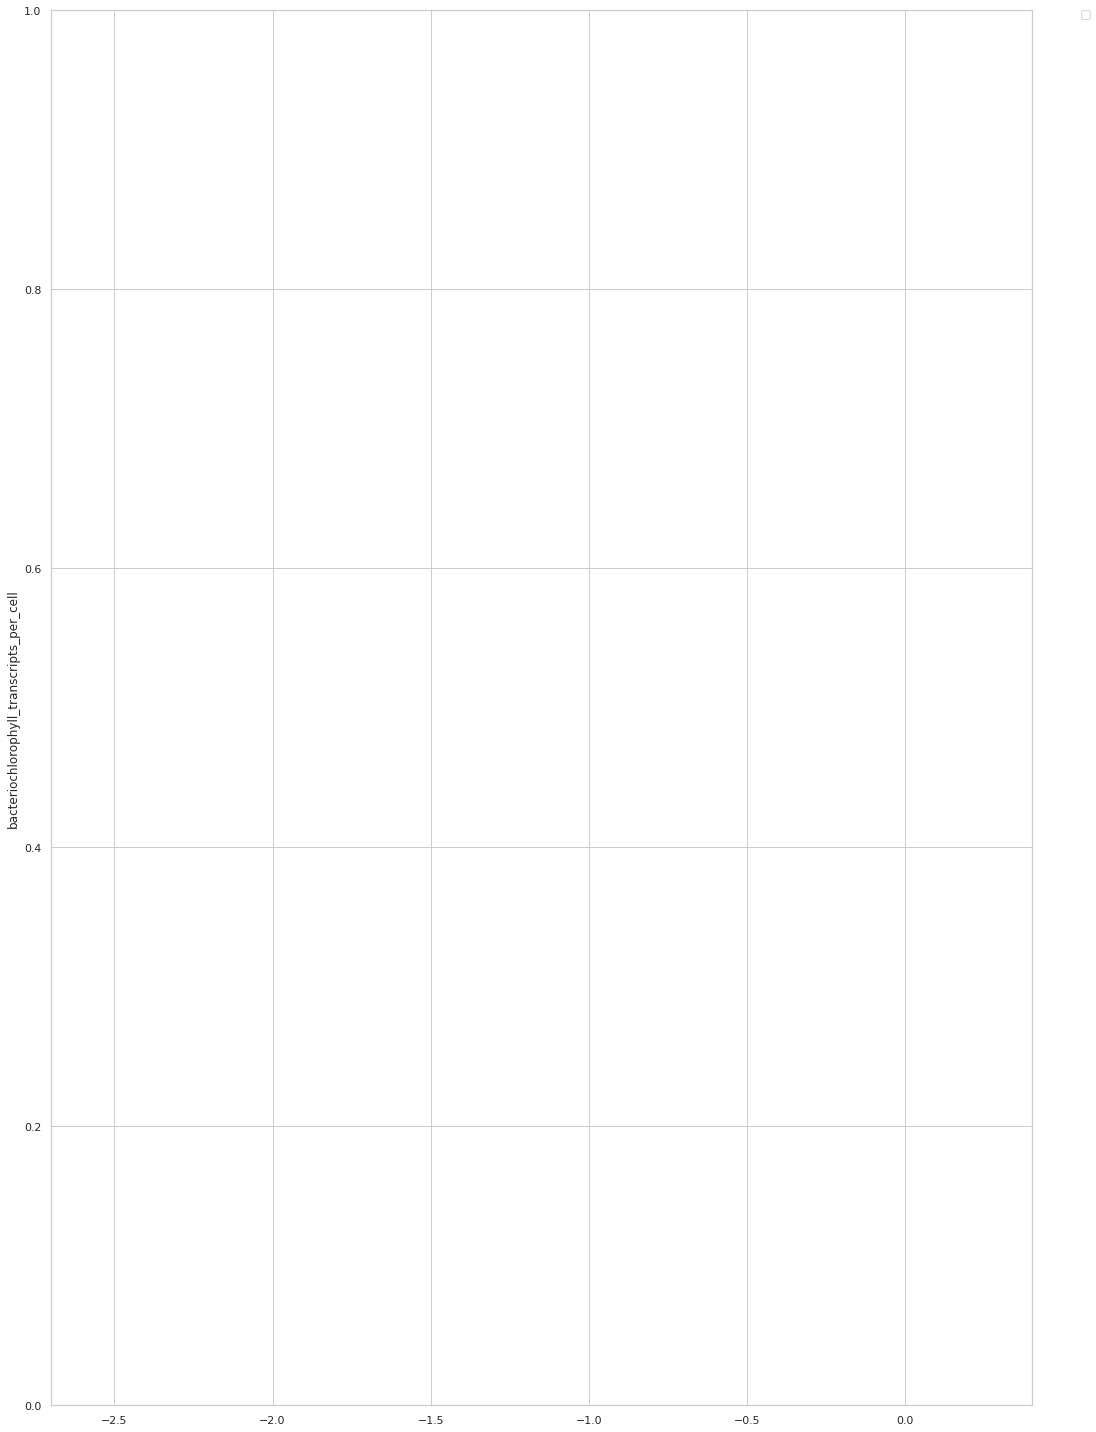

<Figure size 432x288 with 0 Axes>

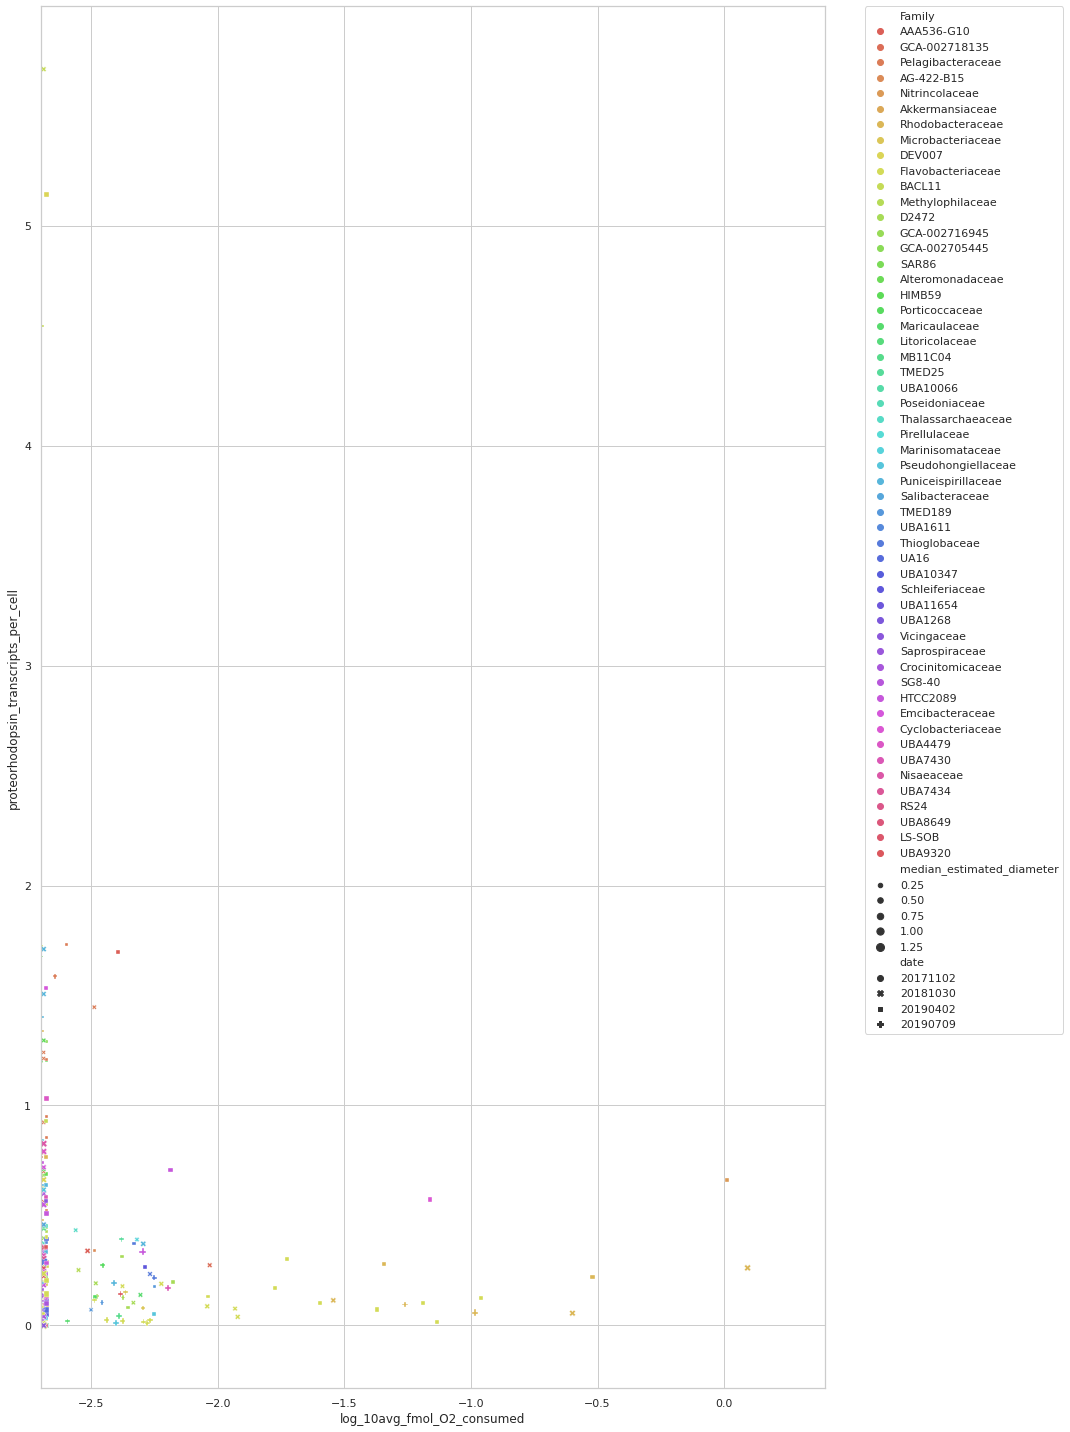

cytochrome_c_oxidase_transcripts_per_cell  \
genus           date                                                  
AAA164-E04      20171102                                   0.000000   
                20181030                                   0.140961   
                20190402                                   0.000000   
                20190709                                   0.000000   
AAA536-G10      20171102                                        NaN   
...                                                             ...   
Winogradskyella 20190402                                   0.087925   
                20190709                                   0.000000   
Yoonia          20171102                                   0.968799   
                20181030                                   0.136665   
                20190402                                   0.008009   

                          nirA_transcripts_per_cell  \
genus           date                                  
AAA164-E04      20171102                        NaN   
                20181030                        NaN   
                20190402                        NaN   
                20190709                        NaN   
AAA536-G10      20171102                        NaN   
...                                             ...   
Winogradskyella 20190402                        NaN   
                20190709                        NaN   
Yoonia          20171102                        NaN   
                20181030                        NaN   
                20190402                        NaN   

                          cysH_transcripts_per_cell  \
genus           date                                  
AAA164-E04      20171102                   0.750753   
                20181030                        NaN   
                20190402                        NaN   
                20190709                   0.417700   
AAA536-G10      20171102                        NaN   
...                                             ...   
Winogradskyella 20190402                        NaN   
                20190709                        NaN   
Yoonia          20171102                        NaN   
                20181030                        NaN   
                20190402                        NaN   

                          bacteriochlorophyll_transcripts_per_cell  \
genus           date                                                 
AAA164-E04      20171102                                       NaN   
                20181030                                       NaN   
                20190402                                       NaN   
                20190709                                       NaN   
AAA536-G10      20171102                                       NaN   
...                                                            ...   
Winogradskyella 20190402                                       NaN   
                20190709                                       NaN   
Yoonia          20171102                                       NaN   
                20181030                                       NaN   
                20190402                                       NaN   

                          proteorhodopsin_transcripts_per_cell  
genus           date                                            
AAA164-E04      20171102                                   NaN  
                20181030                                   NaN  
                20190402                                   NaN  
                20190709                                   NaN  
AAA536-G10      20171102                              1.375089  
...                                                        ...  
Winogradskyella 20190402                              0.205159  
                20190709                              0.083524  
Yoonia          20171102                                   NaN  
                20181030                    

<Figure size 432x288 with 0 Axes>

In [14]:
# number of transcripts for specific genes including proteorhodopsin

genes=['cytochrome_c_oxidase', 'nirA', 'cysH', 'bacteriochlorophyll', 'proteorhodopsin']
df = Prokka.filter(['genus','date'], axis=1)
for i in genes:
    i_transcripts=Prokka.filter(regex=i, axis=1)
#    print(i)
    i_transcripts=i_transcripts.dropna(how='all')
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts[i+'_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[[i+'_transcripts_per_cell']].copy()
    
    
    
    df=df.merge(i_total, on=['genus', 'date'], how='left')
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    
    
    #merge with O2 consumption data and genus data and drop duplicates
    i_transcripts=i_transcripts.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts=i_transcripts.merge(genus_stats, on=['genus'], how='left')
    i_transcripts=i_transcripts.drop_duplicates()
    
    # limit to genera with cell size <2um and take the log of O2 consumed
    i_transcripts=i_transcripts[i_transcripts['median_estimated_diameter'] <= 2]
    i_transcripts['log_10avg_fmol_O2_consumed']=np.log10(i_transcripts['avg_fmol_O2_consumed'])

    #make and save scatter plot
    plt.figure(figsize=(15,20))
    testfig=sns.scatterplot(data=i_transcripts, y=i+'_transcripts_per_cell', x='log_10avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel(i+ "_transcripts_per_cell")
    plt.xlim([-2.7,0.4])
    plt.show() 
    
    fig=testfig.get_figure()
    plt.savefig(images +"number_"+ i+"_transcripts_all_genera.pdf")

df=df.dropna(how='all', axis=0)
df.to_csv(outdir+'Gene_transcripts_per_cell.csv')
df

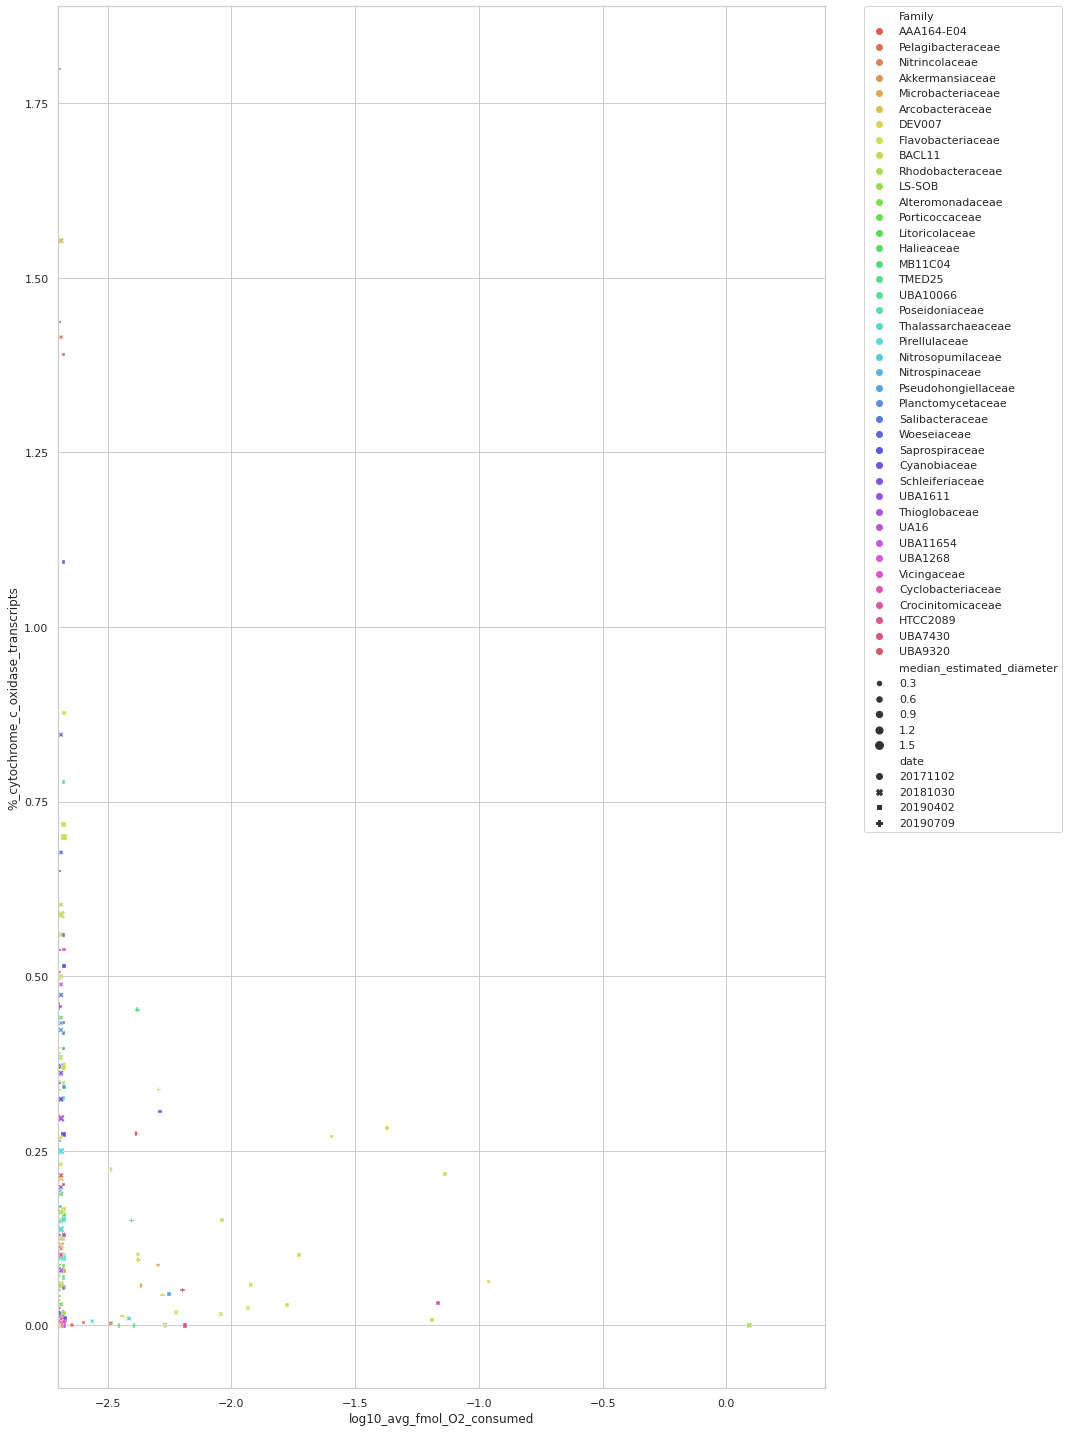

No handles with labels found to put in legend.


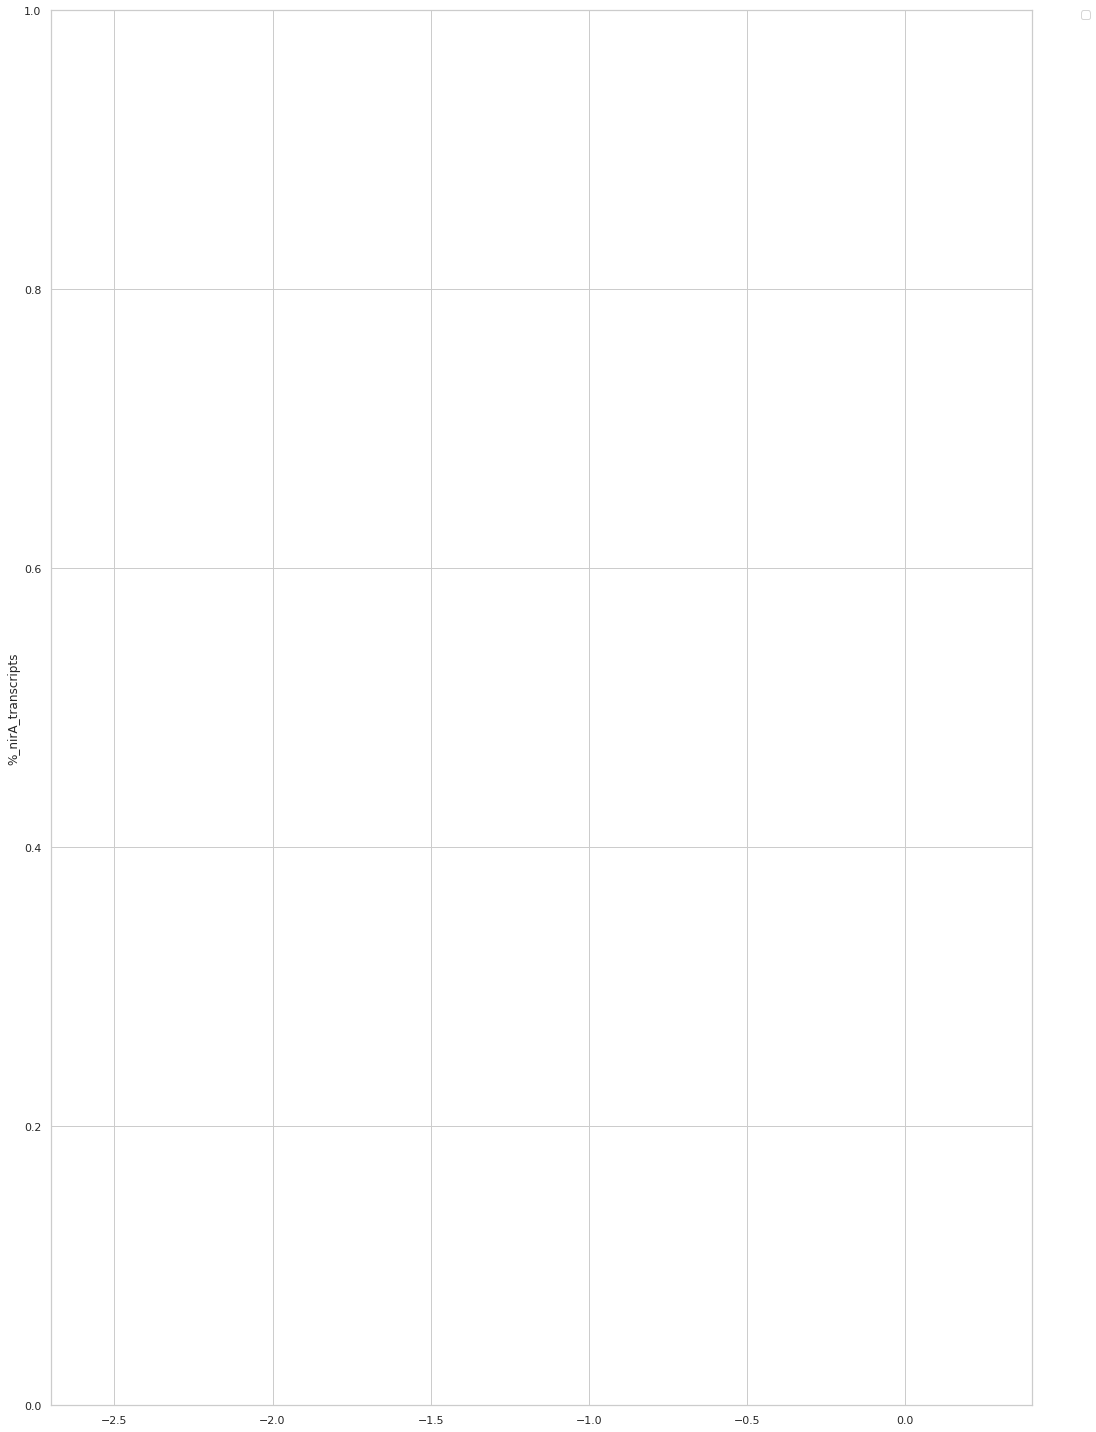

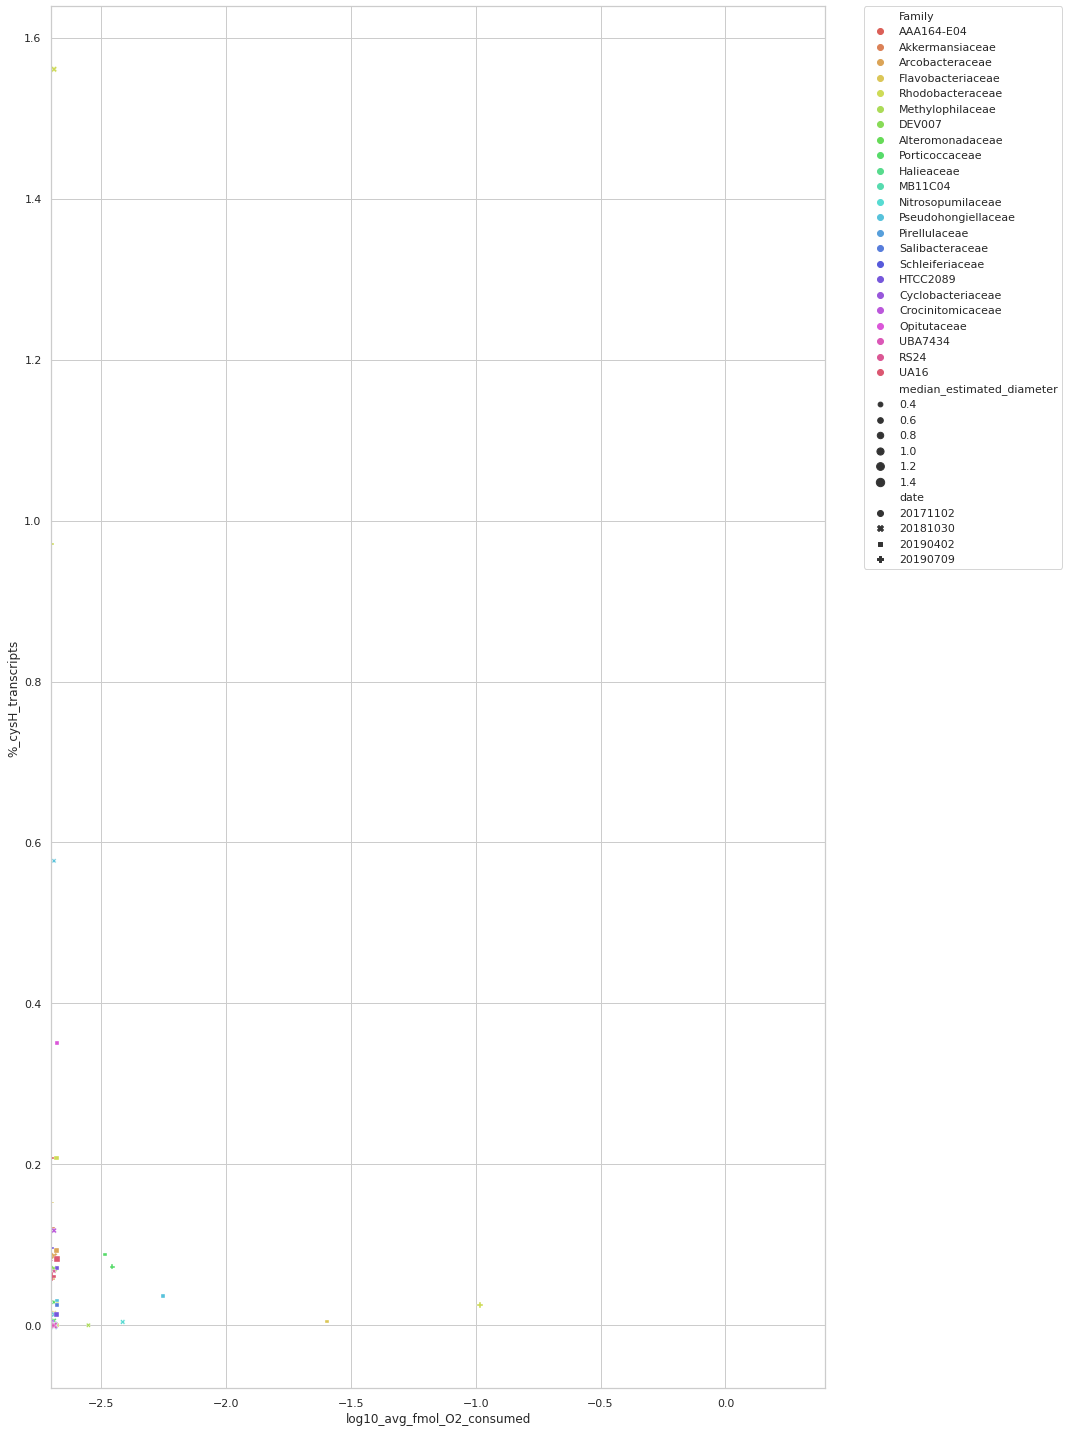

No handles with labels found to put in legend.


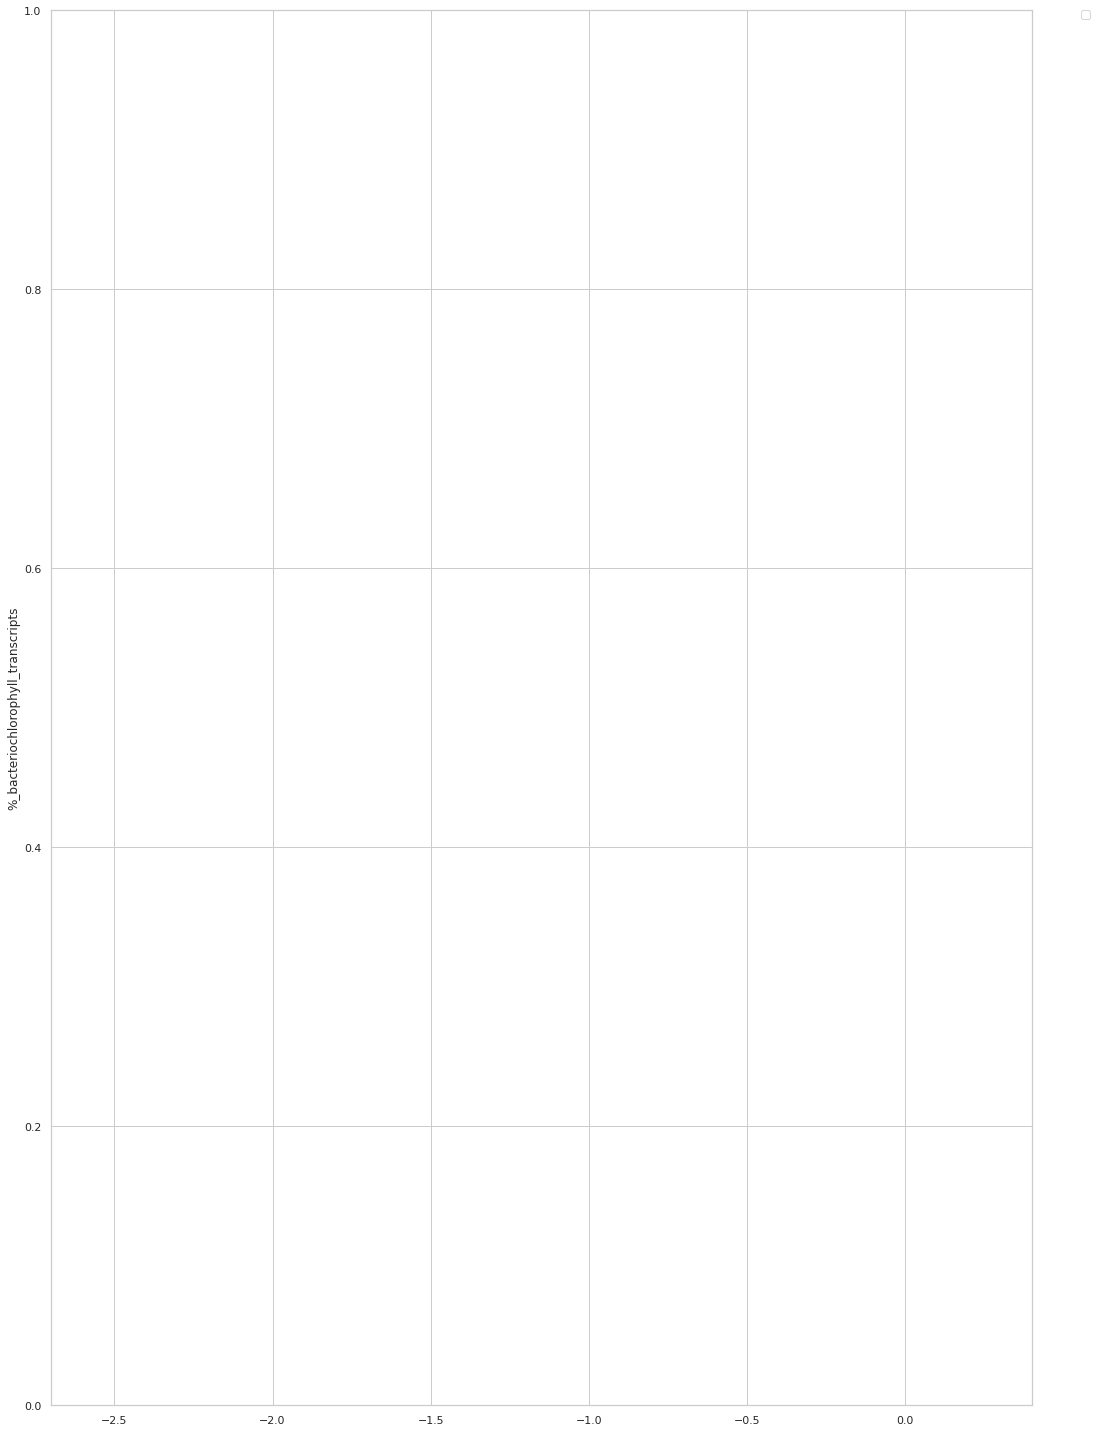

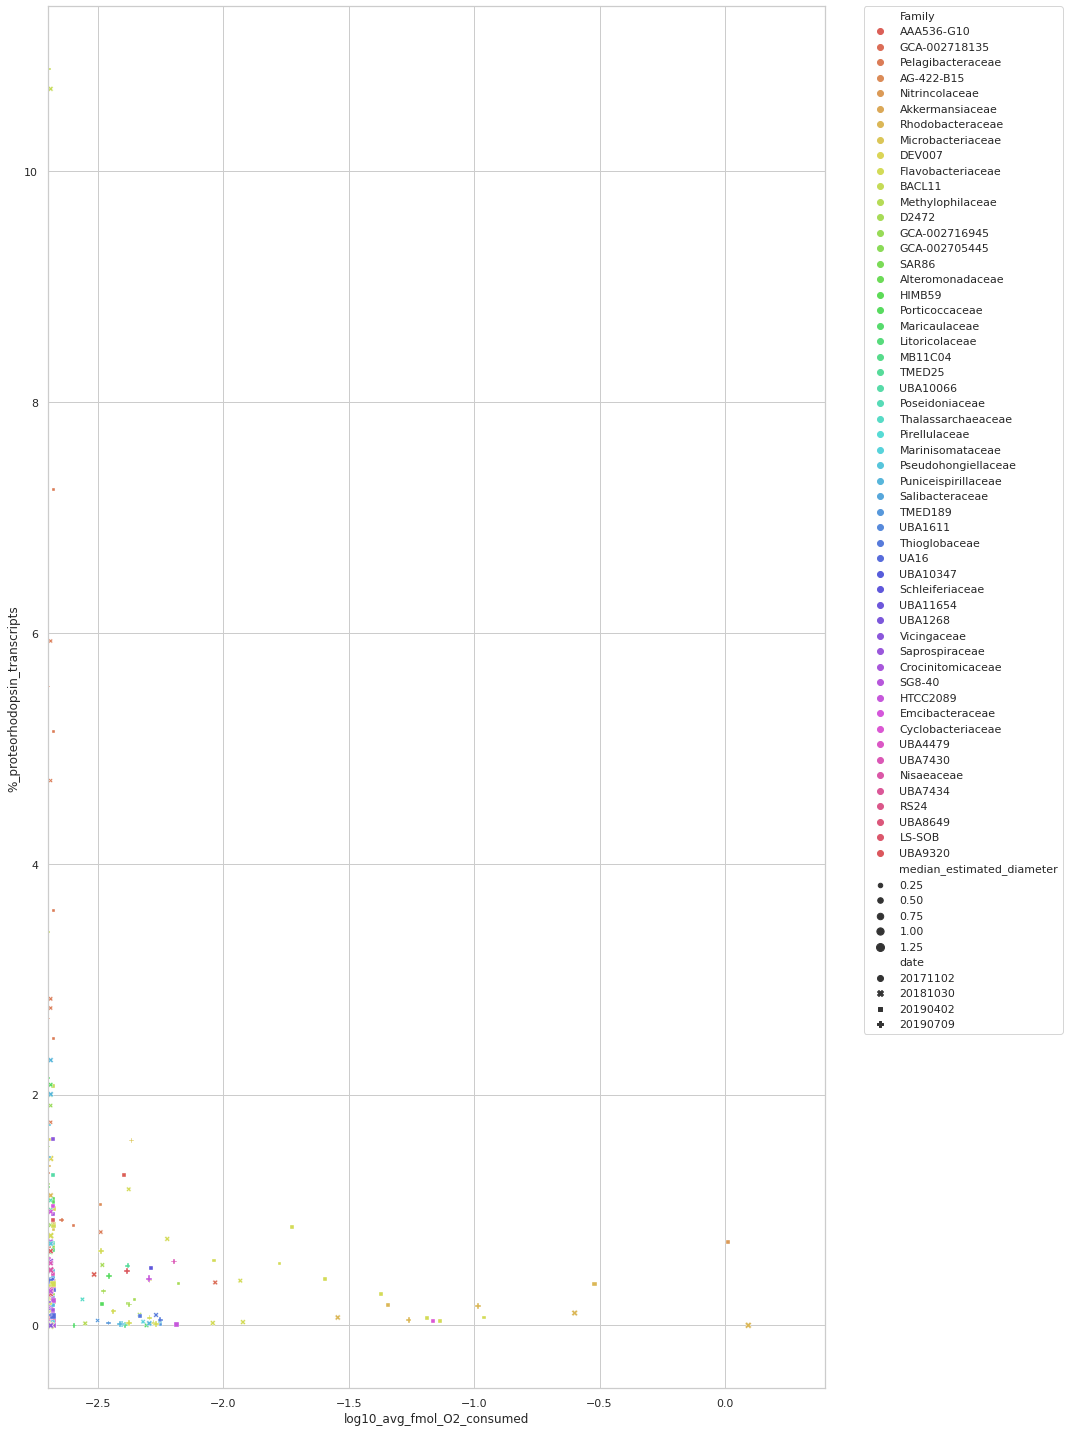

In [15]:
#using just a couple of key genes as representative of each pathway

for i in genes:
    i_transcripts=Prokka.filter(regex=i, axis=1)
    i_transcripts=i_transcripts.dropna(how='all', axis=0)
    
    #sum all the transcripts per cell and copy to new df
    i_transcripts['metabolism_transcripts_per_cell']=i_transcripts.sum(axis=1)
    i_total=i_transcripts[['metabolism_transcripts_per_cell']].copy()
    
    #merge with total recruited RNA and calculate the % of RNA in that metabolism
    i_transcripts_perc=i_total.merge(RNApercell, on=['genus', 'date'], how='left')
    i_transcripts_perc['%metabolism_transcripts']=(i_transcripts_perc['metabolism_transcripts_per_cell']/
                                                   i_transcripts_perc['transcripts_per_cell'])*100
    
    #merge with O2 consumption data and genus data and drop duplicates

    i_transcripts_perc=i_transcripts_perc.merge(O2_consumption, on=['genus', 'date'], how='left')
    i_transcripts_perc=i_transcripts_perc.merge(genus_stats, on=['genus'], how='left')
    i_transcripts_perc=i_transcripts_perc.drop_duplicates()
    
    i_transcripts_perc=i_transcripts_perc[i_transcripts_perc['median_estimated_diameter'] <=2 ]
    # take the log of O2 consumed

    i_transcripts_perc['log10_avg_fmol_O2_consumed']=np.log10(i_transcripts_perc['avg_fmol_O2_consumed'])
    i_transcripts_perc['log10_cells_per_ml']=np.log10(i_transcripts_perc['cells_per_ml'])

    #make and save scatter plot
    plt.figure(figsize=(15,20))
    testfig=sns.scatterplot(data=i_transcripts_perc, y='%metabolism_transcripts', x='log10_avg_fmol_O2_consumed', 
                    style='date', hue='Family', palette='hls', size='median_estimated_diameter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.ylabel( "%_" +i+ "_transcripts")
#    plt.ylim([0,2.5])
    plt.xlim([-2.7,0.4])
    plt.show()
    fig=testfig.get_figure()
    fig.savefig(images +"percent_"+ i+"_transcripts_all_genera.pdf")